In this project we will build a model which will predict if a particular patient has Cardio vascular Disease.

The dataset used in this is the Cleveland Heart Disease dataset.Dataset has 1025 rows and 14 columns
which are described below.
1. Age, in years
2. Sex, 1 = male; 0 = female
3. cp: chest pain type
– Value 0: typical angina
– Value 1: atypical angina
– Value 2: non-anginal pain
– Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dAttribute Information:
6. fbs: (fasting blood sugar > 120 mg/dl) 1 = true; 0 =false
7. restecg: resting electrocardiographic results
– Value 0: normal
– Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV)
– Value 2: showing probable or definite left ventricu lar hypertrophy by Estes’ criteria
8. thalach: maximum heart rate achieved during stress TEST
9. exang: exercise induced angina, 1 = yes; 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
– Value 0: upsloping
– Value 1: flat
– Value 2: downsloping
12. ca: number of major vessels (0-4) colored by flourosopy
13. thal: thalassmia, 0 = null; 1=normal; 2 = fixed defect; 3 = reversible defect
14. condition (target) : 0 = no disease, 1 = disease


In [1]:
## Importing the Basis Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings  ## To ignore the Warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd() ## Use to get the path of present working directory

'/content'

In [3]:
## Importing the dataset and converting it into Dataframe

df = pd.read_csv('Cardio_vascular.csv') ## we will be using 'Cardio_vascular.csv'

df.head()## Checking the first 5 rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,51,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,54,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,71,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,60,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,61,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape ## To check the shape of the dataset

(1025, 14)

Dataset has 1025 rows and 14 columns

In [5]:
## If We observe column names are in abbreviation so we will rename it for our better understanding

df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},
          inplace=True)

In [6]:
df.info() ## To check the results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1025 non-null   int64  
 1   gender              1025 non-null   int64  
 2   rest_cp             1025 non-null   int64  
 3   rest_bp             1025 non-null   int64  
 4   cholesterol         1025 non-null   int64  
 5   fast_bloodsugar     1025 non-null   int64  
 6   rest_ecg            1025 non-null   int64  
 7   stress_HR           1025 non-null   int64  
 8   Exercise_cp         1025 non-null   int64  
 9   STdepression_Exerc  1025 non-null   float64
 10  STpeak_exerc        1025 non-null   int64  
 11  coloured_vessels    1025 non-null   int64  
 12  thalassmia          1025 non-null   int64  
 13  heart_disease       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Dataset has not missing values and all the columns are numerical column

In [7]:
df.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.458537,0.695610,0.942439,148.078049,246.668293,0.149268,0.529756,149.218537,0.336585,1.052976,1.385366,0.754146,2.323902,0.513171
std,9.054764,0.460373,1.029641,23.059022,51.789267,0.356527,0.527878,23.002315,0.472772,1.191635,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,71.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,131.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,151.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,165.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,202.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


It shows the Min age in the dataset is 29 and max is 77 with avg to 54. Similary for other columns we can observe
the records

In [8]:
## Check the Duplicate records
df.duplicated().sum()

10

In [9]:
df[df.duplicated()]

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
155,54,1,1,162,309,0,1,156,0,0.0,2,0,3,1
345,66,1,1,159,246,0,1,120,1,0.0,1,3,1,0
411,56,1,0,178,249,1,0,144,1,1.2,1,1,2,0
550,69,1,2,132,254,0,0,146,0,2.0,1,3,3,0
556,59,1,0,162,177,0,1,162,1,0.0,2,1,3,0
646,47,1,2,132,243,0,1,152,0,0.0,2,0,2,0
651,41,1,1,143,157,0,1,182,0,0.0,2,0,2,1
751,65,0,2,132,360,0,0,151,0,0.8,2,0,2,1
770,41,1,1,143,203,0,1,132,0,0.0,1,0,1,1
826,42,1,2,159,180,0,1,150,0,0.0,2,0,2,1


These are the duplicate records

In [10]:
# Dropping the Duplicate Records

df.drop_duplicates(inplace=True)

In [11]:
df.shape ## checking the shape post dropping it duplicate records

(1015, 14)

Record redcuce to 1015 from 1025 with same no. of columns i.e 14

In [12]:
## Checking the unique values in each columns
df.nunique()

,0
age,42
gender,2
rest_cp,4
rest_bp,100
cholesterol,159
fast_bloodsugar,2
rest_ecg,3
stress_HR,92
Exercise_cp,2
STdepression_Exerc,40


As we can see the , age has 42 unique values, gender has 2 and so on

# EDA

In [13]:
# Observing the Data Distribution
# We can observe the Skewness and Kurtosis to check the data distrubtion.

# 1.Skewness -
# Skewness Plays an importance role as usually we consider the data to be normally distibuted however in real world
# the data is not normally distibuted.It has some skewness attached to it.

## Mathamatically

## Mainly in the case of Regression we consider the data to be normally distributed however in the real world we hardly
## Find a normal distributed dataset. So it is important to check the Skewness of the data. If it lies in the
## Range of -1 to +1 then we consider it to be normally distributed else the data has skewness in it.
## We can check the skewness of the data using the .skew() function

skewness = df.skew()
print(skewness)

age                  -0.253866
gender               -0.841141
rest_cp               0.536113
rest_bp              -0.385845
cholesterol           1.089386
fast_bloodsugar       1.966007
rest_ecg              0.189498
stress_HR            -0.516807
Exercise_cp           0.690955
STdepression_Exerc    1.302477
STpeak_exerc         -0.476676
coloured_vessels      1.262080
thalassmia           -0.527306
heart_disease        -0.053300
dtype: float64


Most of the values between -1 to 1 can be consider as normal distribution

In [14]:
# 2.Kurtosis:
# Kurtosis : It is a also a characteristic of frequency distribution that gives an idea about the shape of
# distrbution
# Kurtosis can be check using .kurt() and like skewness, all the values between -3 to 3 are consider to be
# normally distributed

kurtosis = df.kurt()
print(kurtosis)

age                  -0.507092
gender               -1.295038
rest_cp              -1.146687
rest_bp              -0.398450
cholesterol           4.043860
fast_bloodsugar       1.868860
rest_ecg             -1.302634
stress_HR            -0.082709
Exercise_cp          -1.525591
STdepression_Exerc    1.660984
STpeak_exerc         -0.648485
coloured_vessels      0.714306
thalassmia            0.270894
heart_disease        -2.001106
dtype: float64


All the values between -3 to 3 can be consider as normal distribution

([], [])

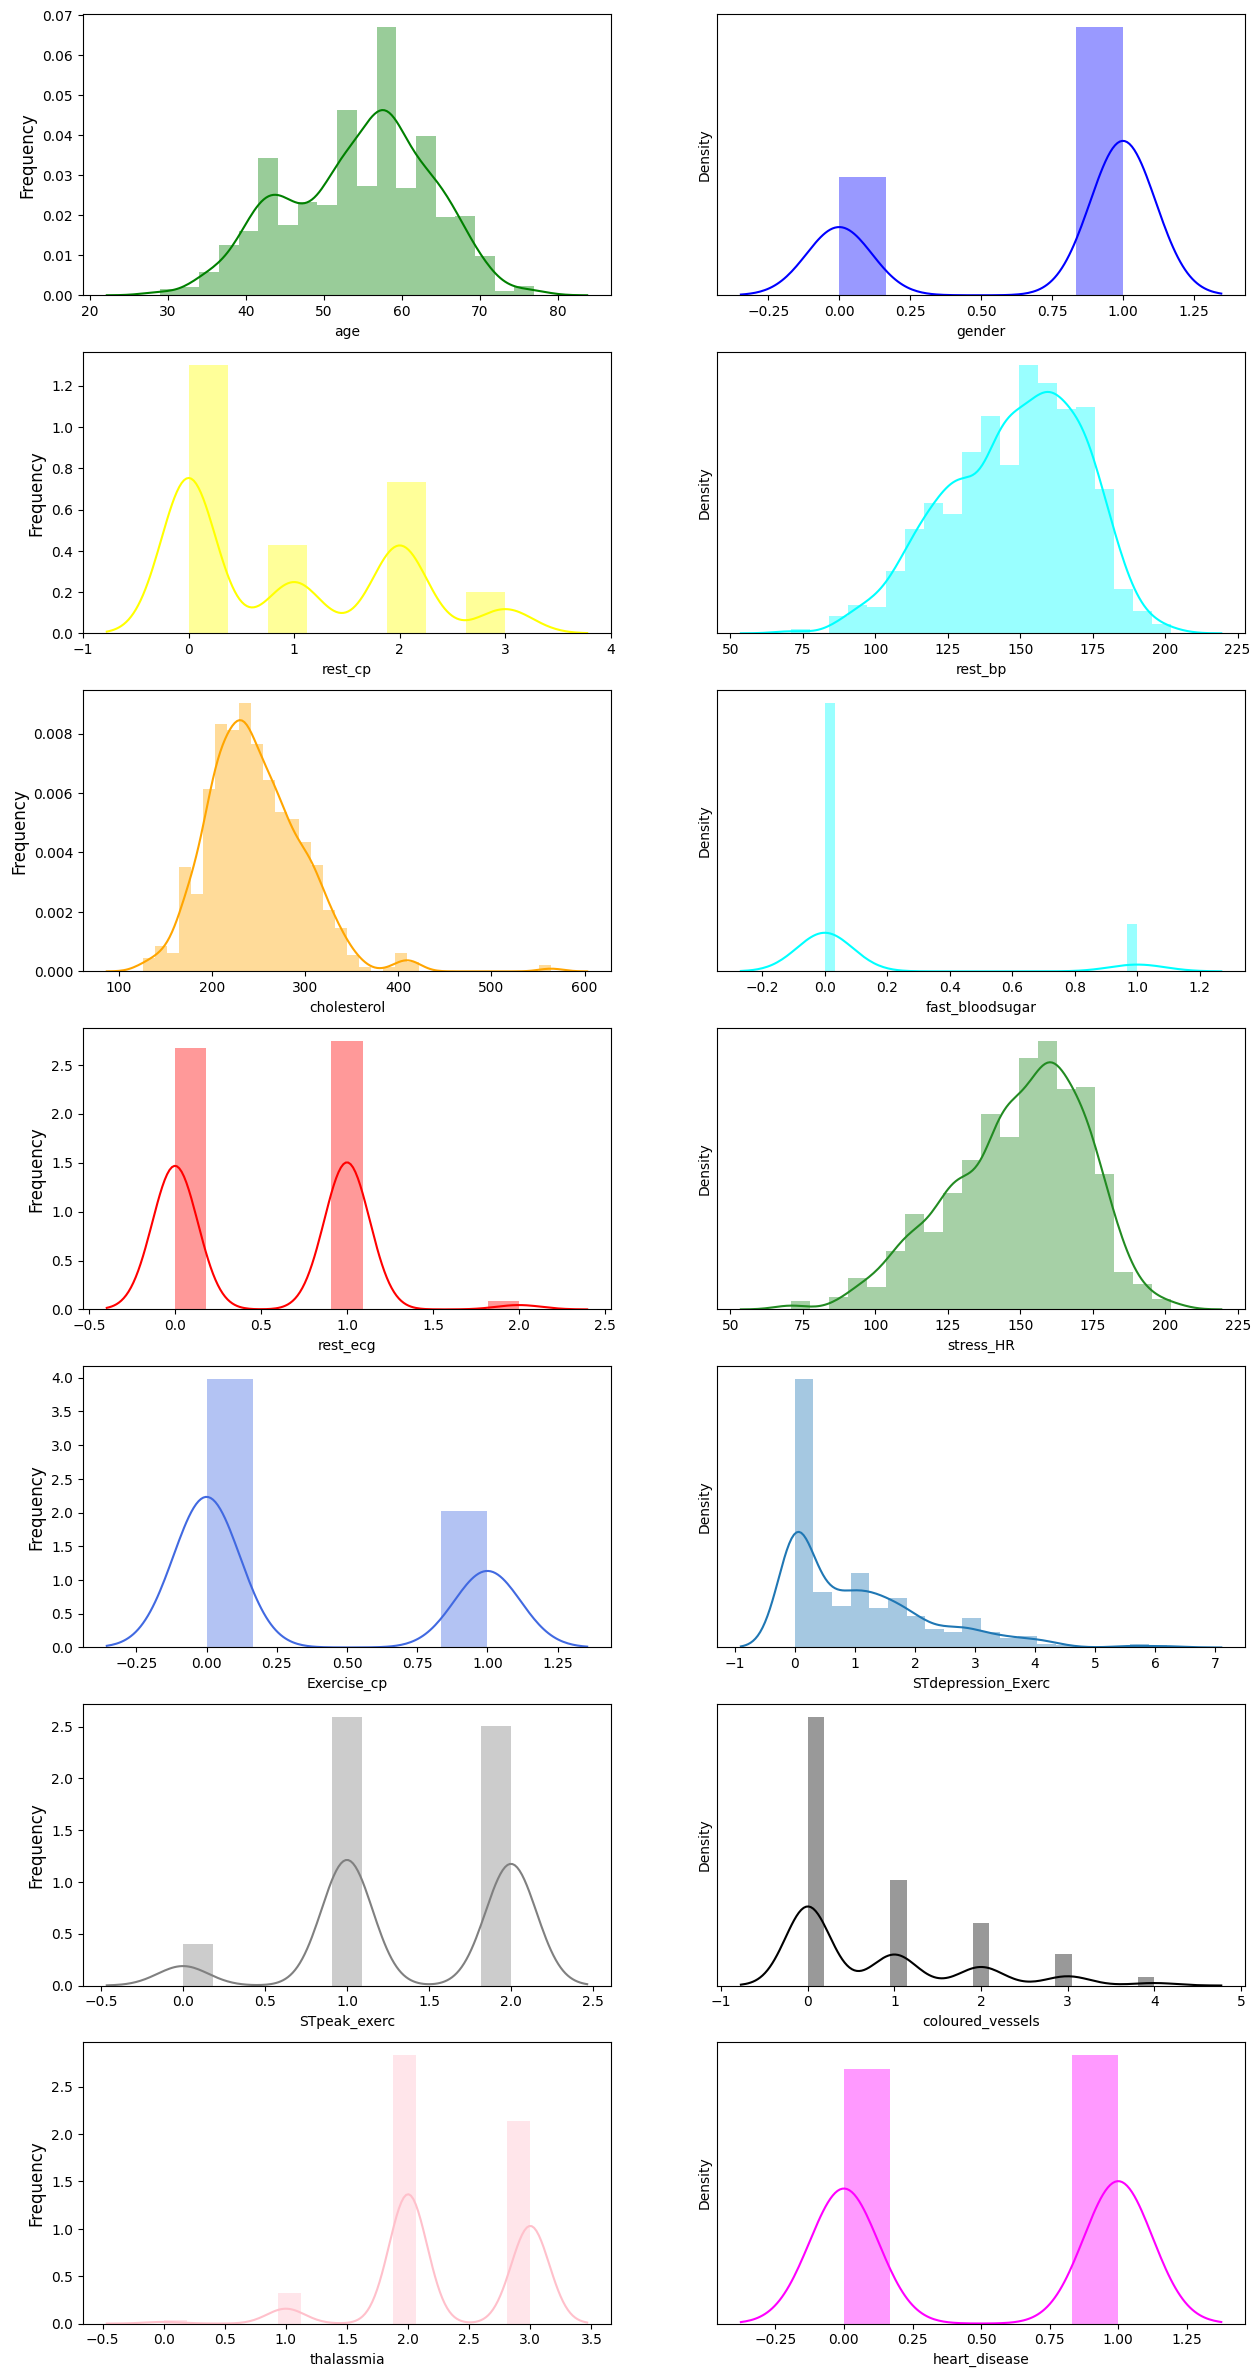

In [15]:
## Checking the Distribution of each column visually

## For this we will plot the dist plot of each column and observe the trend

plt.figure(figsize=(15,30))

plt.subplot(7,2,1)
sns.distplot(df.age, color='green')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,2)
sns.distplot(df.gender, color='blue')
plt.yticks([])

plt.subplot(7,2,3)
sns.distplot(df.rest_cp, color='yellow')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,4)
sns.distplot(df.rest_bp , color='cyan')
plt.yticks([])

plt.subplot(7,2,5)
sns.distplot(df.cholesterol, color='orange')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,6)
sns.distplot(df.fast_bloodsugar, color='cyan')
plt.yticks([])

plt.subplot(7,2,7)
sns.distplot(df.rest_ecg, color='red')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,8)
sns.distplot(df.stress_HR, color='forestgreen')
plt.yticks([])

plt.subplot(7,2,9)
sns.distplot(df.Exercise_cp, color='royalblue')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,10)
sns.distplot(df.STdepression_Exerc)
plt.yticks([])

plt.subplot(7,2,11)
sns.distplot(df.STpeak_exerc, color='grey')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,12)
sns.distplot(df.coloured_vessels, color='black')
plt.yticks([])

plt.subplot(7,2,13)
sns.distplot(df.thalassmia, color= 'pink')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,14)
sns.distplot(df.heart_disease, color='magenta')
plt.yticks([])

As observe most of them are following the Nornal distribution

In [16]:
## Checking Class Distribution in Target Variable

df.heart_disease.value_counts()

,count
heart_disease,
1,521
0,494


<Axes: xlabel='heart_disease', ylabel='count'>

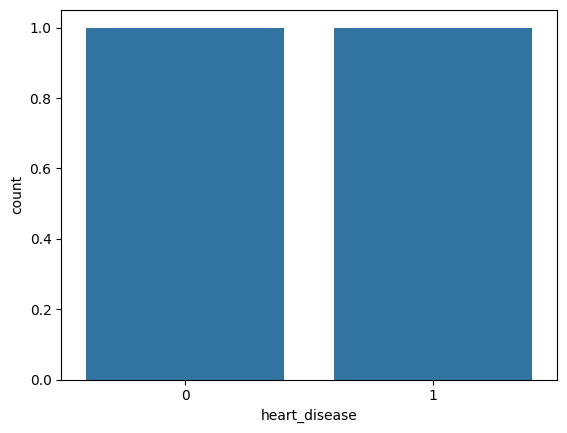

In [18]:
# Visual rep the Target Variable

sns.countplot(df.heart_disease.value_counts())

Yes there are 523 heart disease and 495 No heart disease patients.
It indicate if a person visit to a hospital just with a symptoms,  50% chances are there that he is a patient of
heart disease.
Overall its a balance dataset .

In [19]:
# 'rest_cp' column

df.rest_cp.value_counts()

,count
rest_cp,
0,495
2,280
1,163
3,77


‘rest_cp’ = Chest pain type
………… 0 = Typical angina
………… 1 = Atypical angina
………… 2 = Non-anginal pain
………… 3 = Asymptomatic

It indicates most patients are diagnose with -Typical angina

In [20]:
#fast_bloodsugar column

df.fast_bloodsugar.value_counts()

,count
fast_bloodsugar,
0,863
1,152


‘fast_bloodsugar’…….(Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

Most people has fasting Blodd sugar less than 120 mg/dl. Its an imbalance data.

In [ ]:
# ‘rest_bp’..Resting blood pressure (in mm Hg on admission to the hospital)

In [21]:
# rest_ecg column

df.rest_ecg.value_counts()

,count
rest_ecg,
1,506
0,494
2,15


‘rest_ecg’…Resting electrocardiographic results
………… 0 = Normal
………… 1 = Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
………… 2= Showing probable or definite left ventricular hypertrophy by Estes’ criteria

It indicates if a patient enter into the hospital there are more chances that his ECG is either normal or falls in
category 1, and there are less chances that it falls in category 2. Its an imbalanced data

In [ ]:
#‘stress_HR’…Maximum heart rate achieved during stress test

In [22]:
# Exerccise_cp column

df.Exercise_cp.value_counts()

,count
Exercise_cp,
0,673
1,342


Exercise_cp’…..Exercise induced angina (1 = yes; 0 = no)

In [23]:
#‘STdepression_Exerc’…ST depression induced by exercise relative to rest

In [ ]:
# STpeakc_exerc column

df.STpeak_exerc.value_counts()

1    478
2    463
0     74
Name: STpeak_exerc, dtype: int64

‘STpeak_exerc’…..Slope of the peak exercise ST segment
0 = upsloping; 1 = flat; 2 = downsloping

In [26]:
# coloured_vessels column

df.coloured_vessels.value_counts()

,count
coloured_vessels,
0,565
1,224
2,134
3,67
4,18


‘coloured_vessels’………Number of major vessels (0-3) found colored by flourosopy measurement

In [25]:
# thalassmia

df.thalassmia.value_counts()

,count
thalassmia,
2,539
3,407
1,62


‘thalassmia’…….0 = null;1=normal; 2 = fixed defect; 3 = reversable defect

As observed 0 indicates the null values which doesn't make any sense so we will delete the rows corresponds to
0 value of thalassmia


In [24]:
## Drop row where df.thalassmia==0

df = df[df.thalassmia>0] ## Reassigning df

df.shape

(1008, 14)

Rows reduced to 1008

In [27]:
# thalassmia column
df.thalassmia.value_counts()

,count
thalassmia,
2,539
3,407
1,62


class '0' has been removed

In [28]:
# cholesterol column

df.cholesterol.value_counts()

,count
cholesterol,
234,19
197,19
212,18
254,17
269,16
...,...
329,1
331,1
361,1


Total cholesterol
LDL — ‘bad cholesterol”
HDL — ‘good cholesterol”
In adults, the total cholesterol levels are considered desirable less than 200 milligram per decilitre ( mg / dL).
Borderlines are considered

In [29]:
(df.cholesterol>200).sum()

842

So out of 1008 patients 842 has higher cholesterol level and 162 has normal

In [31]:
# gender Column

df.gender.value_counts()

,count
gender,
1,700
0,308


700 are male and 308 are female

<Axes: xlabel='gender', ylabel='count'>

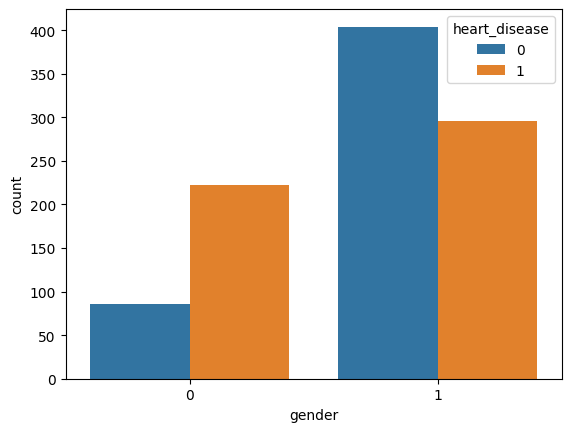

In [32]:
# Checking distribution with target variable

sns.countplot(x=df.gender,hue=df.heart_disease )

Females has less changes of having Heart Diseases than Male

CP:- chest pain type (4 values)
Value 0: typical angina,
Value 1: atypical angina,
Value 2: non-anginal pain,
Value 3: asymptomatic

Typical angina means that the history of the patient is classical and chance of having coronary artery blockages is high.

Atypical angina means that the symptoms have some features suggesting blockages and other symptoms which are not specific and chance of blockages is lower.

"silent" (asymptomatic) myocardial ischemia is the most common manifestation of coronary heart disease (CHD)"""

<Axes: xlabel='rest_cp', ylabel='count'>

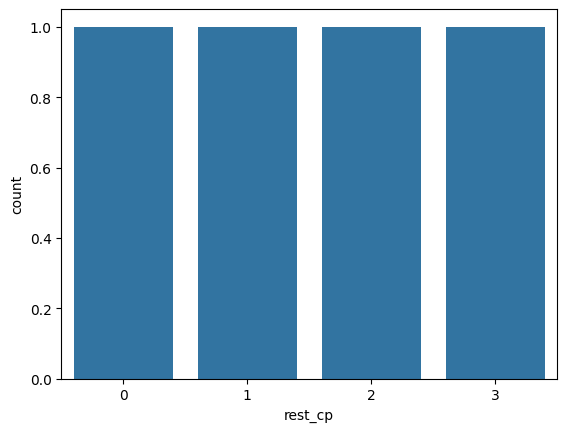

In [35]:
sns.countplot(df.rest_cp.value_counts())

<Axes: xlabel='gender', ylabel='heart_disease'>

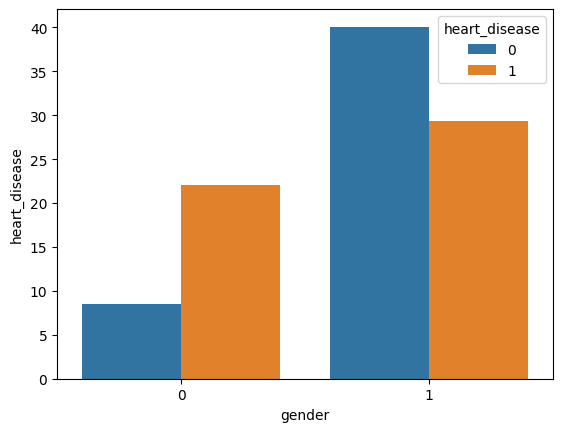

In [36]:
## To check for percentile

sns.barplot(x = df.gender, y=df.heart_disease,hue=df.heart_disease, estimator= lambda x : len(x)/len(df)*100)

<Axes: xlabel='heart_disease', ylabel='rest_cp'>

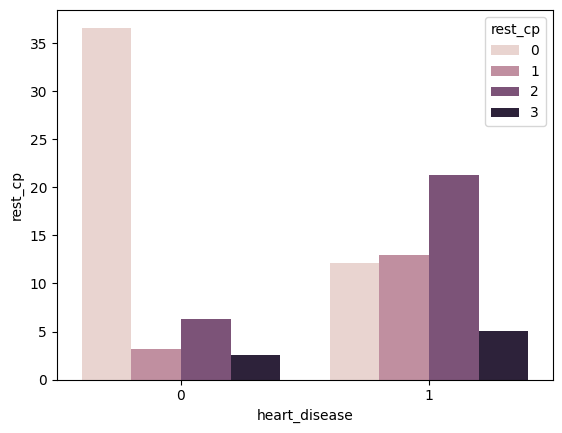

In [37]:
sns.barplot(x= df.heart_disease,y=df.rest_cp,hue = df.rest_cp, estimator= lambda x: len(x)/len(df)*100)

<Axes: xlabel='gender', ylabel='rest_cp'>

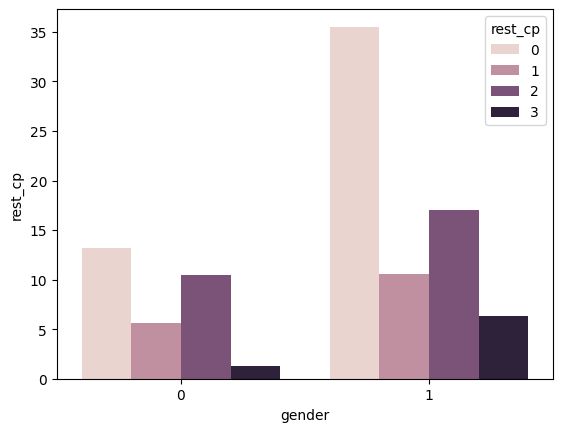

In [38]:
sns.barplot(x= df.gender,y=df.rest_cp,hue = df.rest_cp, estimator= lambda x: len(x)/len(df)*100)

<Axes: xlabel='age', ylabel='Count'>

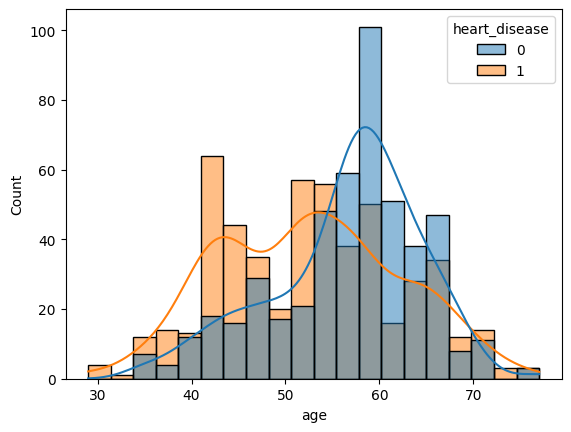

In [39]:
sns.histplot(x= df.age, hue=df.heart_disease, bins=20, kde=True)

Condition (target) : 0 = no disease, 1 = disease
We can say, Cardiovascular diseases maximum risk at age 40-65 age

<Axes: xlabel='thalassmia', ylabel='count'>

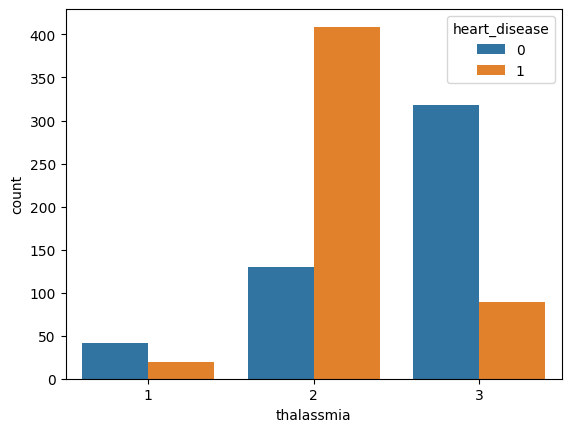

In [44]:
sns.countplot(x='thalassmia', hue='heart_disease', data=df)

In [45]:
# For thalassmia value =1 ,has low chances of having cardio vascular disease
# For thalassmia value =2 ,has higher chances of having cardio vascular disease
# For thalassmia value =3 ,has lowest chances of having cardio vascular disease

<Axes: xlabel='gender', ylabel='count'>

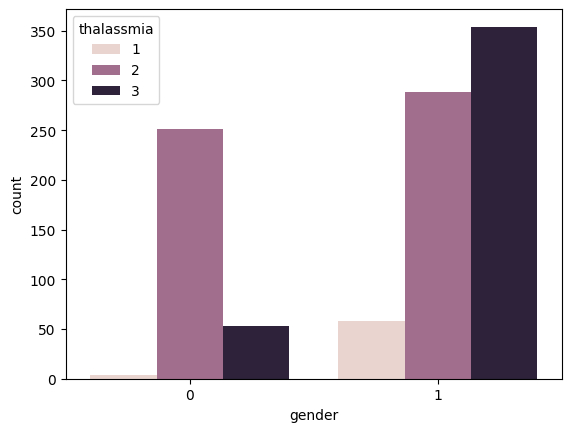

In [48]:
## Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin
## than normal. Hemoglobin enables red blood cells to carry oxygen

# The Beta thalassemia cardiomyopathy is mainly characterized by two distinct pheno types , dilated type,
# with left ventricular dilatation and impaired contractility and a restrictive pheno type, with restrictive left
# ventricular feeling , pulmonary hyper tension and right heart failure. Heart problems, congestive heart failures
# and abnormal heart rhythms can be associated with severe thalassemia.

sns.countplot(x='gender', hue = 'thalassmia', data = df)

In [49]:
## In Females more common class of Thalassmia is Class 1
## In Males, class '3' of Thalassmia is more common

<Axes: xlabel='heart_disease', ylabel='age'>

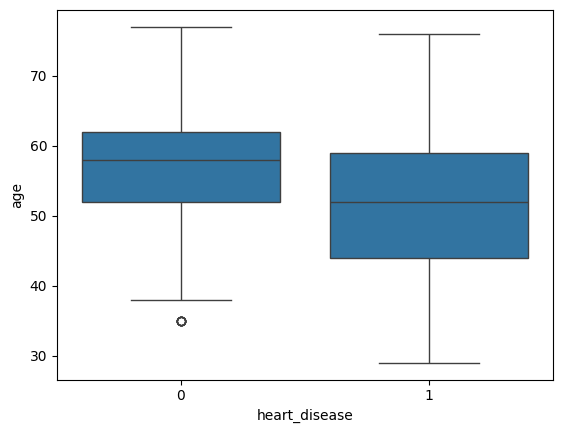

In [51]:
sns.boxplot(x = df.heart_disease, y=df.age)

In [52]:
# From the positive disease (class '1'), we can analyze that our 25th Percentile is 44 year i.e  which means 25% of
# the patient age  is less than 44 year.
# 50th percentile is 50 year,50% of heart disease patients lies below 50 year.
# 75th Percentile value is 58 meaning 75% of data lies below 58

In [53]:
## Checking if the Data is Balance or Imbalances

## In terms of Target Variable with 2 class, if
## 2 * frequency of minor class < Frequcency of Major Class then data is said to be imbalanced.
## Eg, Class 1 = 100, Class 2 = 400,  So 2 * 100< 400 ==> 200>400, Hence data is imbalanced.
## We can use Smote Technique to make the data balance, however working with sensitive data it is advisable not to
## alter the data as its sensitive, like fraud detection, health care data, prediction of Cancer disease etc.

In [54]:
# Checking Outliers

# ALTHOUGH ITS A CLASSIFICATION PROBLEM OUTLIER TREATMENT IS NOT REQUIRED FOR TREE BASED ALGORITHM BUT IN KNN,SVM,
# ITS NEEDED.
# OUTLIER  PLAY HIGH IMPACT IN REGRESSION PROBLEM .#It is not good idea to remove the data by outlier treatment ,
#its better to do square root , or log transformation in place of removing outliers.
# instead of doing outlier and then doing feature scalling , the good idea is to feature scalling directly.
#because after feature scalling many outliers aumatically come in to the range.

# since we are using random forest Bagging method feature scalling is also not required.(no standardization impact)

<Axes: >

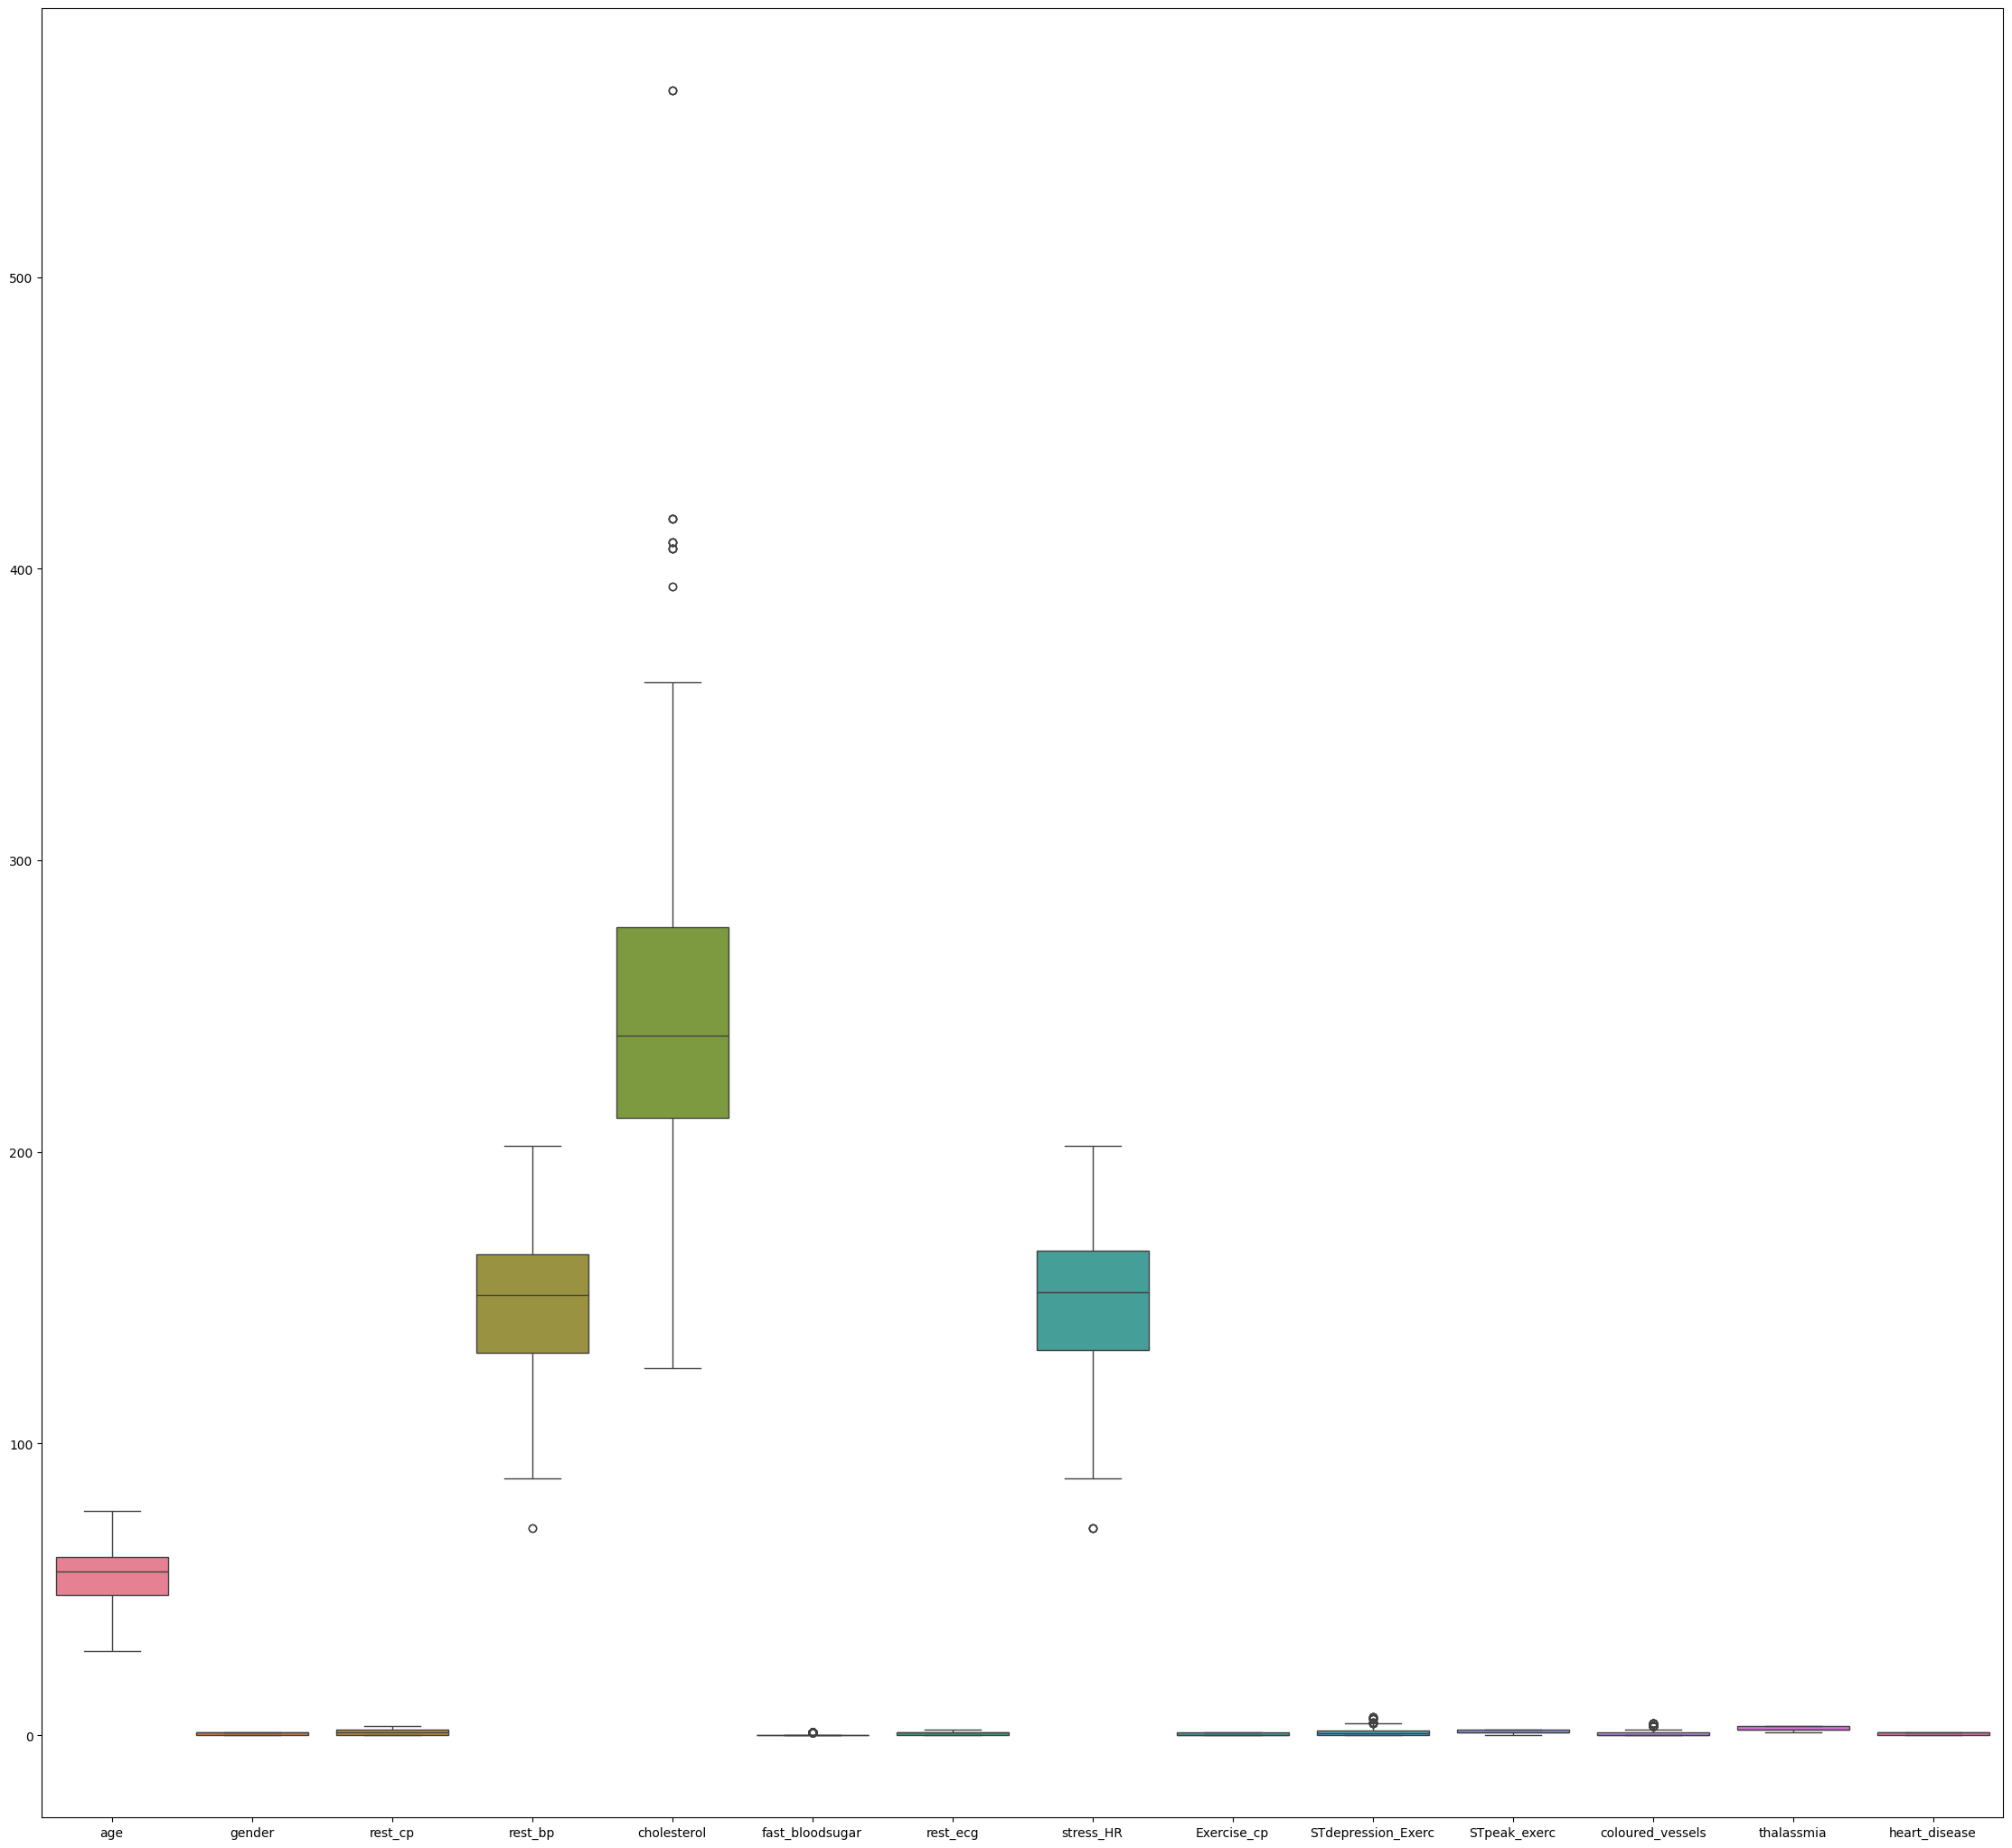

In [55]:
plt.figure(figsize=(28,26))
sns.boxplot(data=df)

In [ ]:
## In the case of Regression, Outlier treatment is important however in the case of Classification we do the treatment
## when we are dealing with distance based problem. Hence in classification distance based problem. Outlier treatment
## is important.

## Modeling
- We will be using following models
  - KNN
  - SVM
  - Logistic Regression
  - Decision Tree
  - Bagging Classifier
  - RandomForest Classifier
  - Naive Bayes

In [58]:
## Splitting the data

## It is very much clear it a clasification problem and our target variable is heart_disease.

x = df.drop('heart_disease', axis =1)
y = df.heart_disease

In [59]:
## Since we are dealing with distance based classification so feature scaling is requeired
## Standarlization has no impacted on Outliers however normalization do.
## So in a dataset where we have outlier, we follow Standarlization.

In [60]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)
x_scaled

array([[-0.38314465,  0.66332496, -0.91178802, ...,  0.9969229 ,
         1.20434249,  1.11475498],
       [-0.05229673,  0.66332496, -0.91178802, ..., -2.23426128,
        -0.73646843,  1.11475498],
       [ 1.82250814,  0.66332496, -0.91178802, ..., -2.23426128,
        -0.73646843,  1.11475498],
       ...,
       [-0.8242752 ,  0.66332496, -0.91178802, ..., -0.61866919,
         0.23393703, -0.58007612],
       [-0.49342729, -1.50755672, -0.91178802, ...,  0.9969229 ,
        -0.73646843, -0.58007612],
       [-0.05229673,  0.66332496, -0.91178802, ..., -0.61866919,
         0.23393703,  1.11475498]])

In [61]:
## X_scaled in arrayformat, we can recovert it into Dataframe

x_scaled_DF = pd.DataFrame(x_scaled,index=x.index, columns=x.columns)
x_scaled_DF  ## Here we are using Index and columns of old X before Standardization.

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
0,-0.383145,0.663325,-0.911788,-1.000540,-0.676562,-0.414841,0.894030,0.811634,-0.710266,-0.053356,0.996923,1.204342,1.114755
1,-0.052297,0.663325,-0.911788,-0.351430,-0.850451,2.410562,-0.999209,0.247678,1.407923,1.703161,-2.234261,-0.736468,1.114755
2,1.822508,0.663325,-0.911788,-0.135060,-1.410761,-0.414841,0.894030,-1.053760,1.407923,1.284943,-2.234261,-0.736468,1.114755
3,0.609399,0.663325,-0.911788,-0.005238,-0.850451,-0.414841,0.894030,0.507965,-0.710266,-0.889793,0.996923,0.233937,1.114755
4,0.719682,-1.507557,-0.911788,-0.437978,0.907763,2.410562,0.894030,-1.878003,-0.710266,0.699437,-0.618669,2.174748,-0.580076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.499116,0.663325,0.057708,1.076613,-0.502673,-0.414841,0.894030,0.638109,1.407923,0.113931,0.996923,-0.736468,-0.580076
1021,0.609399,0.663325,-0.911788,1.119887,0.212205,-0.414841,-0.999209,-0.359660,1.407923,0.281219,-0.618669,0.233937,1.114755
1022,-0.824275,0.663325,-0.911788,1.076613,0.540663,-0.414841,-0.999209,-1.357428,1.407923,-0.889793,-0.618669,0.233937,-0.580076
1023,-0.493427,-1.507557,-0.911788,0.730421,0.134921,-0.414841,-0.999209,0.421203,-0.710266,2.288667,0.996923,-0.736468,-0.580076


<Axes: xlabel='age', ylabel='Count'>

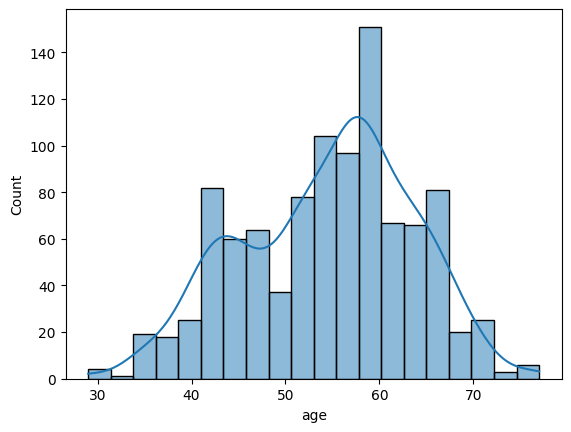

In [62]:
## Comparing the dataset pre and post featuring scaling

sns.histplot(x.age, bins = 20, kde=True)

<Axes: xlabel='age', ylabel='Count'>

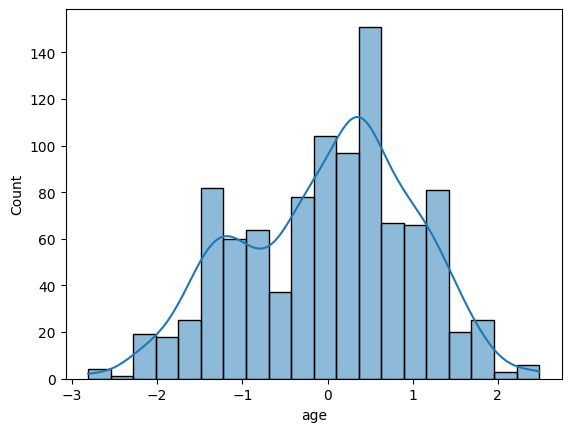

In [63]:
sns.histplot(x_scaled_DF.age, bins=20, kde=True)

In [ ]:
## As we can see both plots are same as standarlization donot modulate the info of the dataset in case of Outliers.

In [64]:
## Multicolinearity

# We are dealing with classification problems so no need to get rid of collinear variables.
## However since it is a distance-based problem, we need to know the multicollinearity in the amount the variables.

## Multicollinearity is the statistical concept where several independent variables in the dataset are correlated.
## Two variables are said to be perfectly collinear if their correlation coefficient is +/- 1.
## Multicollinearity results in less reliable statistical inference.

x_scaled_DF.corr()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
age,1.000000,-0.103779,-0.071549,0.029918,0.217185,0.124519,-0.129516,-0.391421,0.084522,0.163817,-0.167928,0.263325,0.067013
gender,-0.103779,1.000000,-0.034103,0.009439,-0.195188,0.019607,-0.067050,-0.054419,0.133561,0.066016,-0.021070,0.110243,0.205925
rest_cp,-0.071549,-0.034103,1.000000,-0.000114,-0.087656,0.094594,0.050379,0.316371,-0.394989,-0.142131,0.125827,-0.178701,-0.175177
rest_bp,0.029918,0.009439,-0.000114,1.000000,-0.010024,0.004620,0.050686,-0.019385,0.050114,0.002611,-0.011425,0.015931,0.033124
cholesterol,0.217185,-0.195188,-0.087656,-0.010024,1.000000,0.035229,-0.147840,-0.032157,0.076910,0.072700,-0.035783,0.076226,0.097042
fast_bloodsugar,0.124519,0.019607,0.094594,0.004620,0.035229,1.000000,-0.112031,-0.011311,0.031901,0.016550,-0.052868,0.146007,-0.012612
rest_ecg,-0.129516,-0.067050,0.050379,0.050686,-0.147840,-0.112031,1.000000,0.045576,-0.073159,-0.052528,0.088841,-0.076095,-0.016182
stress_HR,-0.391421,-0.054419,0.316371,-0.019385,-0.032157,-0.011311,0.045576,1.000000,-0.388822,-0.295325,0.400132,-0.207621,-0.116725
Exercise_cp,0.084522,0.133561,-0.394989,0.050114,0.076910,0.031901,-0.073159,-0.388822,1.000000,0.236124,-0.262881,0.107021,0.225497
STdepression_Exerc,0.163817,0.066016,-0.142131,0.002611,0.072700,0.016550,-0.052528,-0.295325,0.236124,1.000000,-0.444177,0.178281,0.163831


<Axes: >

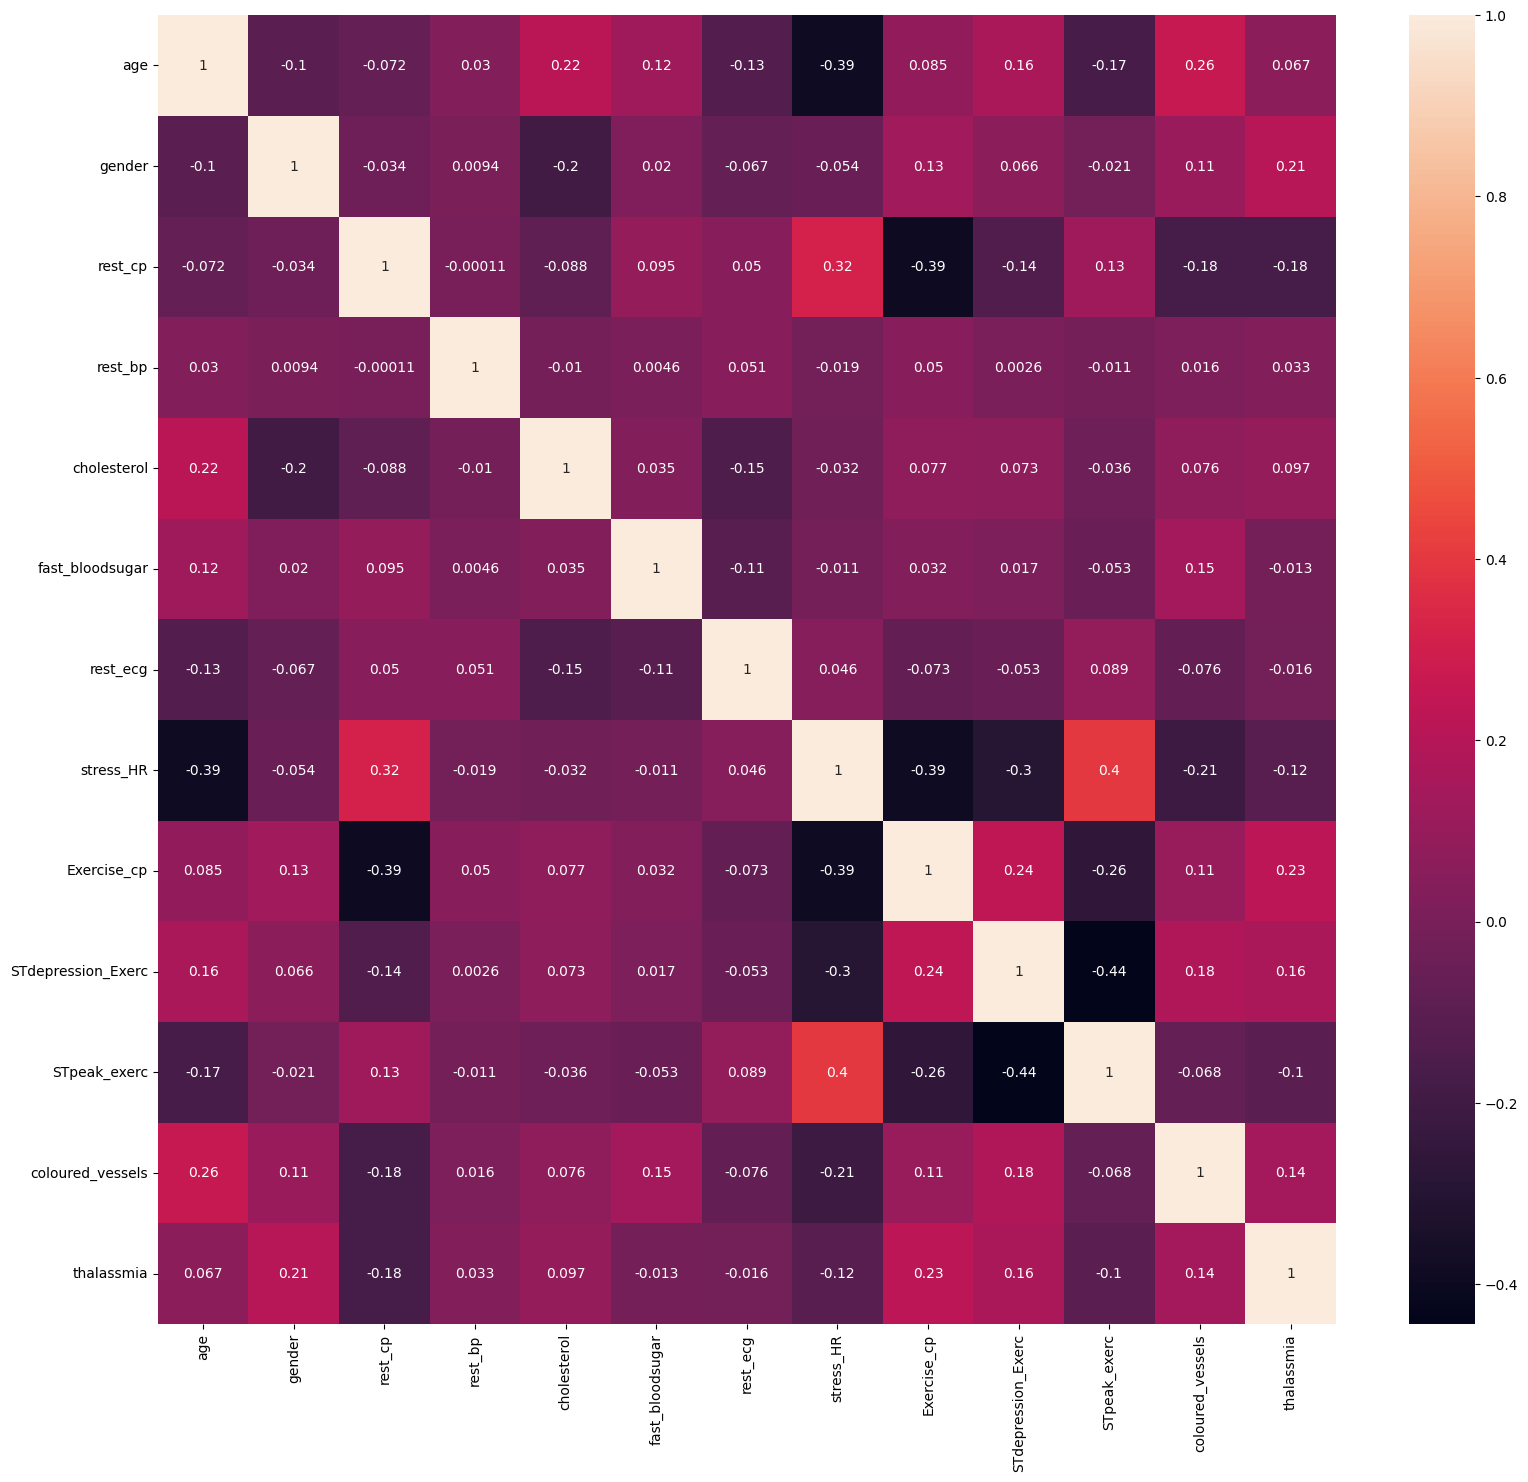

In [66]:
## If the values lies is more than 0.5 or less than -0.5 then there is a multicollinarity in the variables
## We use Heatmap() to check for multicollinarity

plt.figure(figsize=(19,17))
sns.heatmap(x_scaled_DF.corr(), annot=True)

<Axes: >

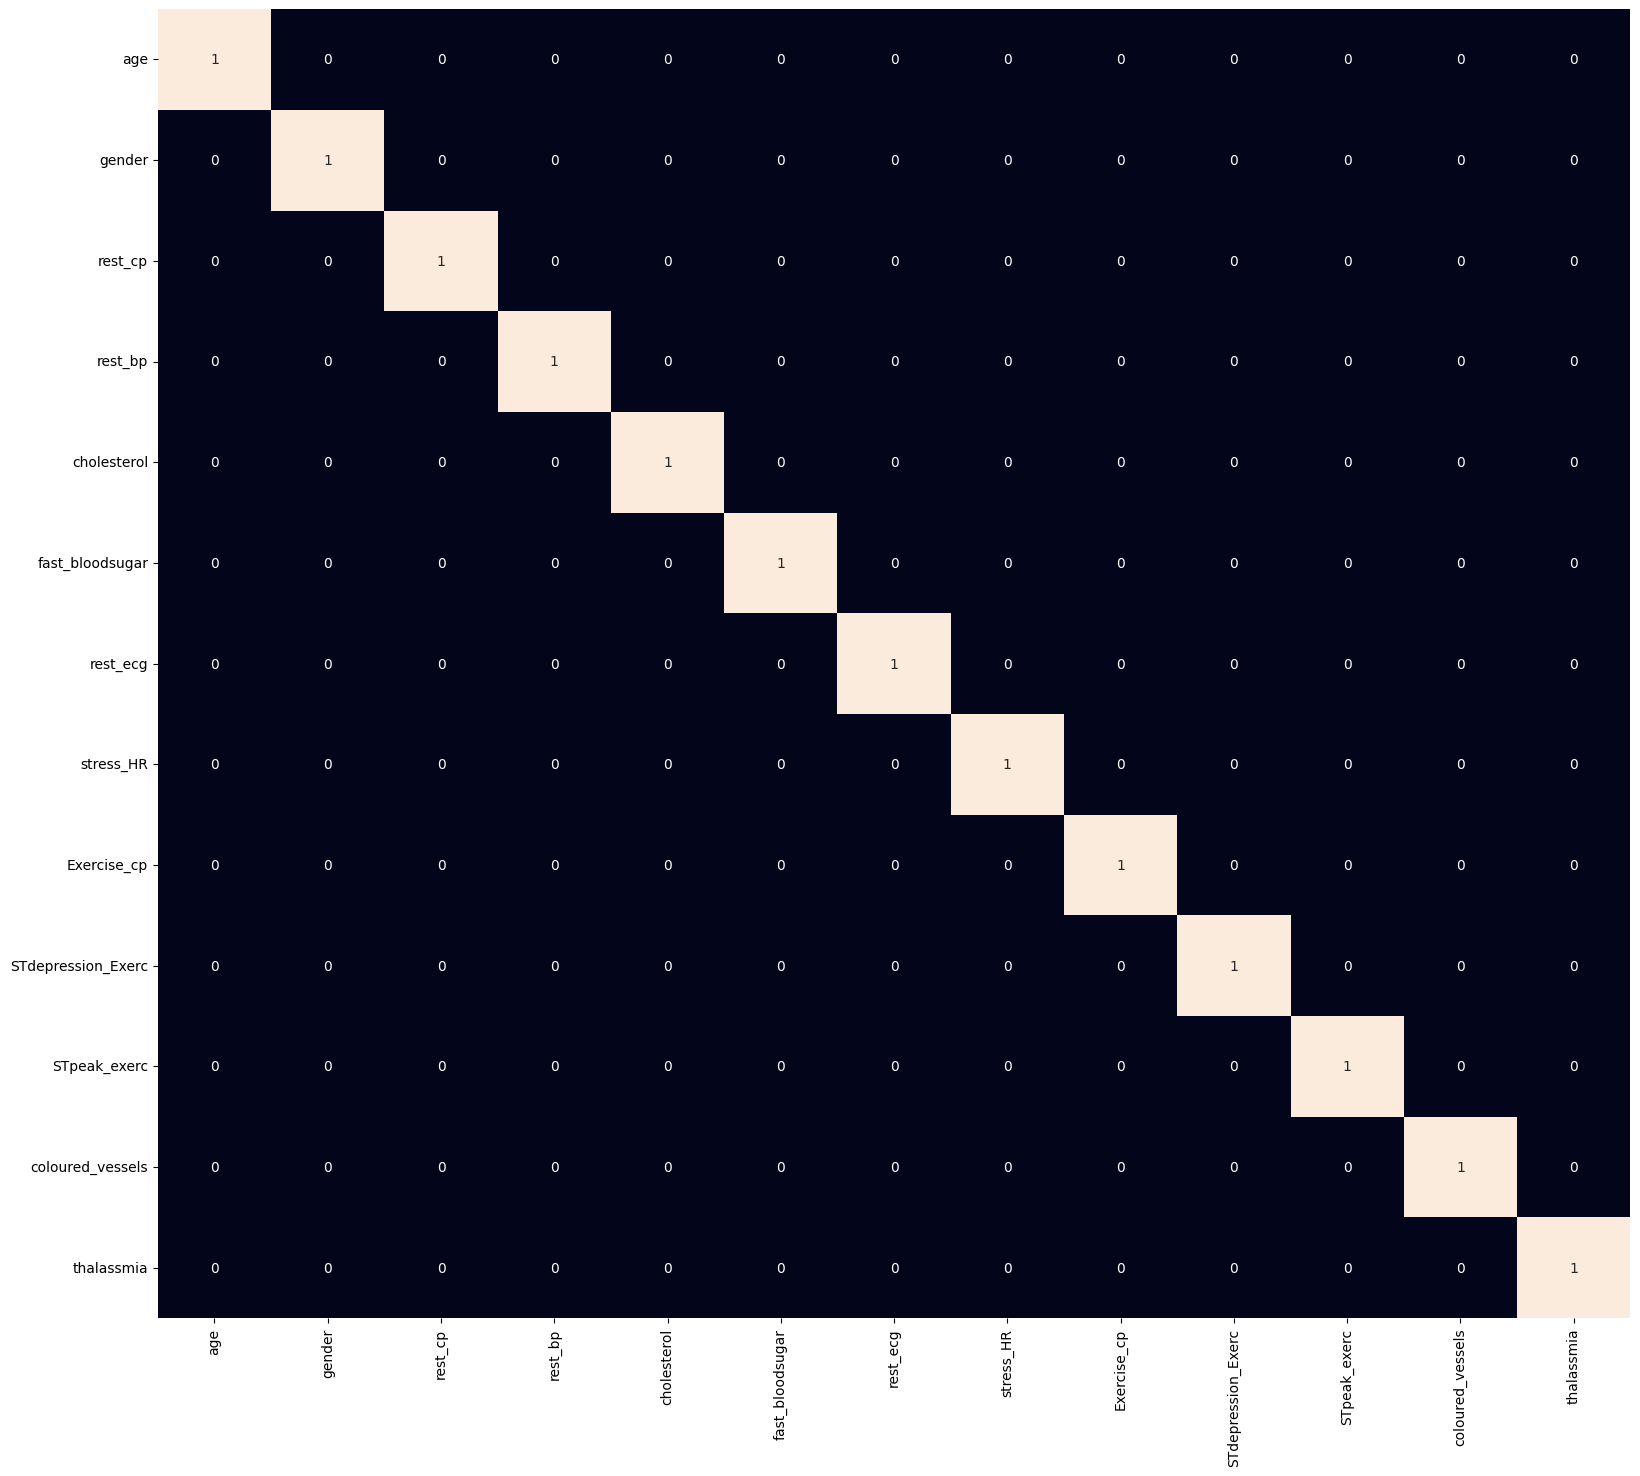

In [67]:
## To make it more clear we can also pass condtion to the heatmap i.e

plt.figure(figsize=(19,17))
sns.heatmap(((x_scaled_DF.corr()>0.5)|(x_scaled_DF.corr()<-0.5)),annot=True, cbar=False)

In [ ]:
## Clearly We donot have Multicollinearlity in the given dataset as so only diagnoal elements are 1 rest are 0.

In [68]:
## Alternative to that would be calculate the VIF
## Varinace Inflation Factor: i.e 1/ Tolerence

from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame()
df['Features'] = x.columns

df['VIF']= [variance_inflation_factor(x_scaled_DF.values,i) for i in range(len(x_scaled_DF.columns))]

## This will calcuate the VIF of Each feature towards the others, if the VIF score is > 5 then multicollinear
## else No Multicollienarity.

df ## Checking the result

,Features,VIF
0,age,1.356617
1,gender,1.151351
2,rest_cp,1.294743
3,rest_bp,1.008157
4,cholesterol,1.141851
5,fast_bloodsugar,1.066270
6,rest_ecg,1.066778
7,stress_HR,1.632681
8,Exercise_cp,1.403943
9,STdepression_Exerc,1.326556


- All the features has VIF < 5, Hence Feautues are no collinear with each other.

In [69]:
## Train_Test Split

from sklearn.model_selection import train_test_split

## On Unscaled data

x_train,x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state= 99)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(705, 13)
(303, 13)
(705,)
(303,)


In [70]:
## On Scaled Data

x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaled_DF,y, train_size=0.7, random_state=99)
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(705, 13)
(303, 13)
(705,)
(303,)


### 1. KNearest Neighbour

In [73]:
from sklearn.neighbors import KNeighborsClassifier

## Trying with Random Value of K= 5 in unscaled Data

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

## Checking the Model Accuracy on Trainng and Testing

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
print('Training Accuracy : ', accuracy_score(y_train,y_pred_train))
print('Testing Accuracy : ', accuracy_score(y_test,y_pred_test))

Training Accuracy :  0.7858156028368795
Testing Accuracy :  0.7062706270627063


Here We observe training accuracy is more than the testing accuracy so data is sligtly overfit.

#### Let try on Scaled Data

In [74]:
from sklearn.neighbors import KNeighborsClassifier

## Trying with Random Value of K= 5 on Scalled Data

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x1_train,y1_train)
y1_pred_train = knn.predict(x1_train)
y1_pred_test = knn.predict(x1_test)

## Checking the Model Accuracy on Trainng and Testing

print('Training Accuracy : ', accuracy_score(y1_train,y1_pred_train))
print('Testing Accuracy : ', accuracy_score(y1_test,y1_pred_test))

Training Accuracy :  0.9304964539007092
Testing Accuracy :  0.8448844884488449


So the Accuracy of the model increases after scalling hence feature scaling has significance.

In [78]:
## Lets try to find the optimum values of K or try model on different values of K

## We will calculate the accuracy for K=1 to K=51 and the plot it to observe the output

acc1 = [] # Empty List to store the accuracy score for  diff values of K.

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train,y1_train)
    Y_pred = knn.predict(x1_test)
    acc1.append(round(accuracy_score(y1_test,Y_pred),3))

print(acc1)


[0.931, 0.884, 0.891, 0.848, 0.845, 0.838, 0.865, 0.861, 0.858, 0.845, 0.842, 0.842, 0.832, 0.832, 0.822, 0.815, 0.815, 0.822, 0.809, 0.809, 0.815, 0.815, 0.809, 0.822, 0.822, 0.828, 0.825, 0.828, 0.815, 0.822, 0.825, 0.828, 0.818, 0.828, 0.818, 0.822, 0.822, 0.832, 0.818, 0.815, 0.815, 0.815, 0.818, 0.825, 0.822, 0.828, 0.828, 0.828, 0.828, 0.832]


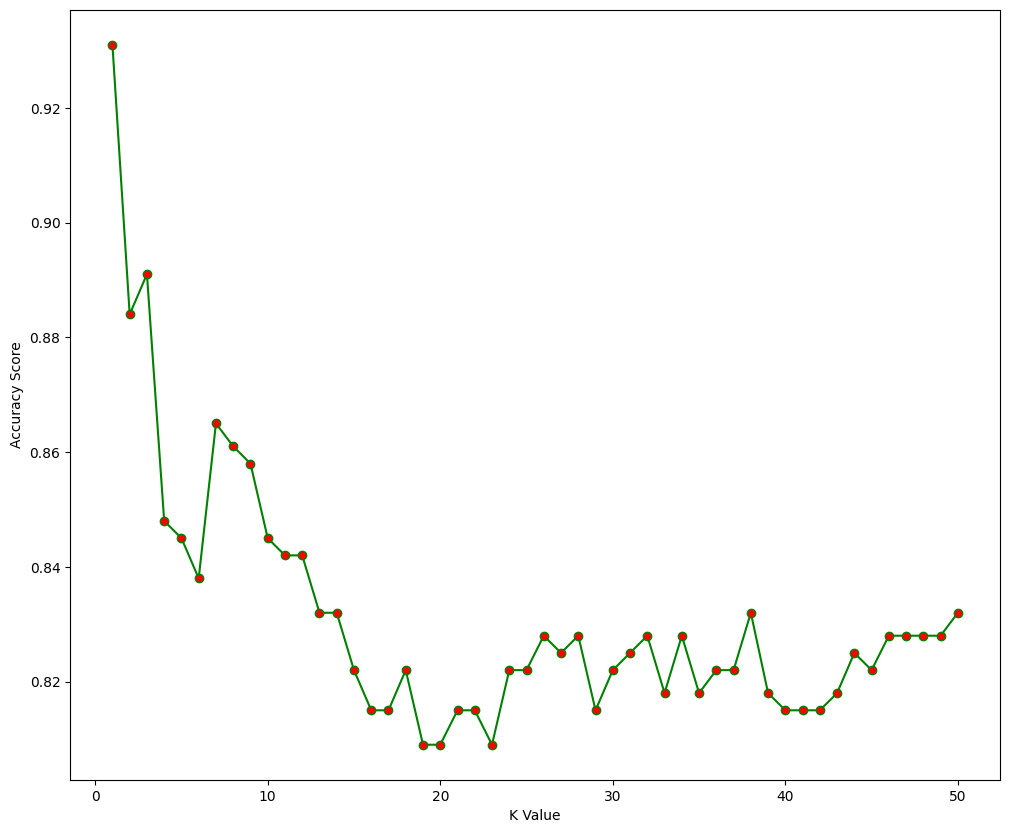

In [81]:
## plotting K vs Accuracy

plt.figure(figsize=(12,10))
plt.plot(range(1,51),acc1, marker= 'o',color ='green', markerfacecolor ='red')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.show()

- The Plot shows optimum accuracy is around k=5 to 7, and we are using 5 only so we will stick to 5.


In [83]:
# Try KNN with n_neighbours = 7

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x1_train, y1_train)
y1_pred_train7 = knn.predict(x1_train)
y1_pred_7 = knn.predict(x1_test)

print('Training Accuracy for K=7', accuracy_score(y1_train,y1_pred_train7))
print('Testing Accuracy for K=7 : ', accuracy_score(y1_test,y1_pred_7))

Training Accuracy for K=7 0.9163120567375886
Testing Accuracy for K=7 :  0.8646864686468647


- k=5 results are overfitting where as k=7 results are better

In [84]:
# To avoid overfitting we can use Cross-Validation

from sklearn.model_selection import cross_val_score

acc = []

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, x1_train, y1_train, cv=10)
    acc.append(score.mean().round(4))

print(acc)


[0.9603, 0.9007, 0.8993, 0.8709, 0.8836, 0.8666, 0.8666, 0.8738, 0.868, 0.8652, 0.8623, 0.8666, 0.8496, 0.8496, 0.8509, 0.8495, 0.8523, 0.8495, 0.841, 0.8409, 0.8353, 0.8424, 0.8381, 0.8381, 0.8325, 0.8395, 0.8325, 0.8396, 0.8382, 0.8396, 0.8354, 0.8354, 0.8353, 0.8396, 0.8396, 0.8367, 0.8339, 0.8424, 0.8367, 0.8368, 0.8325, 0.8325, 0.8354, 0.8354, 0.8382, 0.8382, 0.8382, 0.8396, 0.841, 0.841]


Text(0, 0.5, 'Accuracy Score')

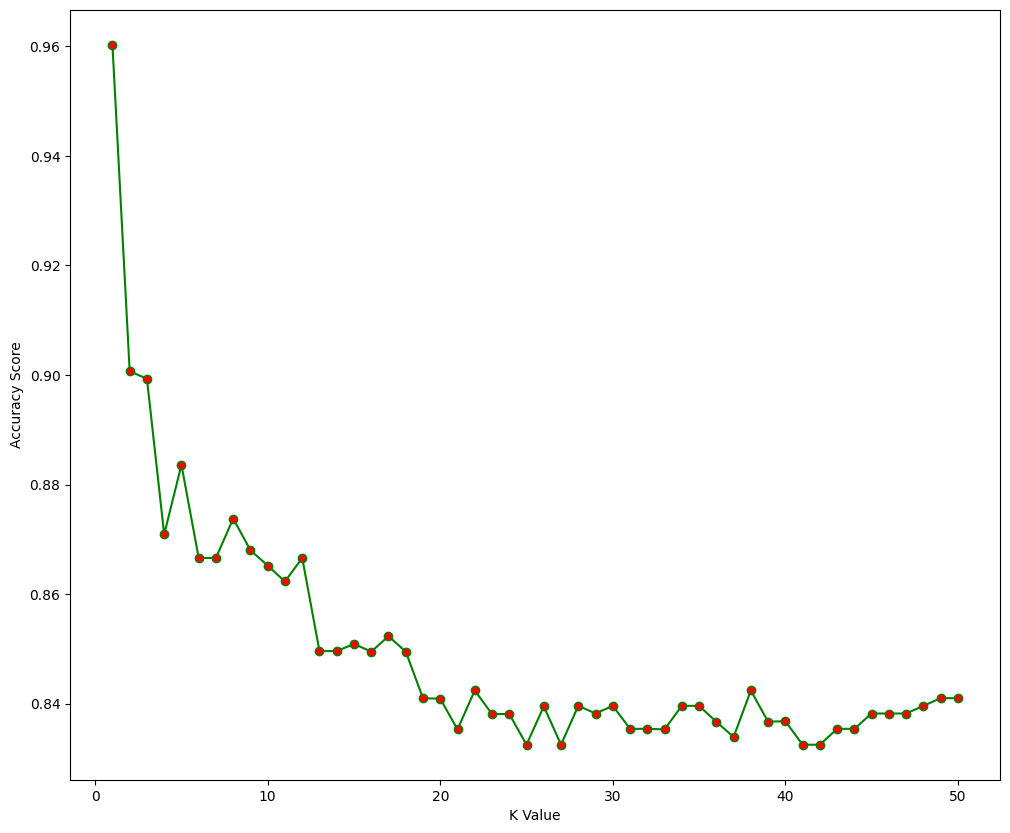

In [85]:
## Ploting the Accuracy Vs K

plt.figure(figsize=(12,10))
plt.plot(range(1,51),acc, marker= 'o',color ='green', markerfacecolor ='red')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
##plt.show()

The three steps involved in cross-validation are as follows :
 - Reserve some portion of sample data-set.
 - Using the rest data-set train the model.
 - Test the model using the reserve portion of the data-set.

Example : Medical diagnosis , lab report.
 - TRUE POSITIVE(TP):-THE NO. OF CASES CORRECTLY IDENTIFIES AS PATIENT.
 - FALSE POSITIVE(FP):-THE NO. OF CASES INCORRECTLY IDENTIFIES AS PATIENT.
 - FALSE NEGATIVE(FN):-THE NO. OF CASES INCORRECTLY IDENTIFIES AS HEALTHY.
 - TRUE NEGATIVE(TN):-THE NO. OF CASES CORRECTLY IDENTIFIES AS HEALTHY.

- In some cases of imbalanced data problems, both Precision and Recall are important so we consider the F1 score as an
evaluation metric.

- There is another concept of the AUC ROC curve for evaluation of a classification model, which is one of the most important
metrics also.

True Negetive :  127
False Positive :  15
False Negetive :  32
True Positve :  129


<Figure size 1000x800 with 0 Axes>

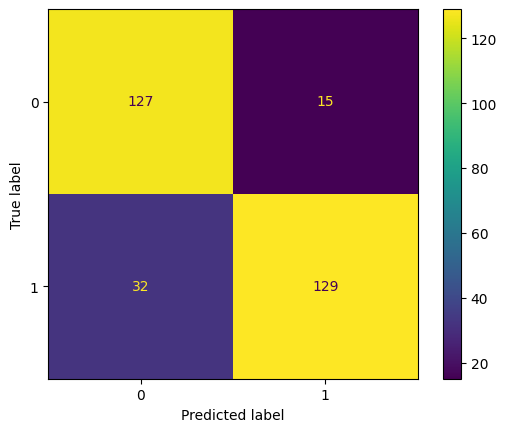

In [91]:
# Confusion matrix
Con_mat = confusion_matrix(y1_test,y1_pred_test)
TN = Con_mat[0,0]
FP = Con_mat[0,1]
FN = Con_mat[1,0]
TP = Con_mat[1,1]
print('True Negetive : ',Con_mat[0,0])
print('False Positive : ', Con_mat[0,1])
print('False Negetive : ',Con_mat[1,0])
print('True Positve : ',Con_mat[1,1])

## Plot Confusion Matrix

plt.figure(figsize=(10,8))
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred_test)

### Here False Positive is know as Type I Error and False Negetive is know as Type II Error

In [92]:
## Classification Report

"""Classification Report Basically, it is an extended version of the confusion matrix.
There are measures other than the confusion matrix which can help achieve better understanding and analysis of
our model and its performance."""

print(classification_report(y1_test,y1_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       142
           1       0.90      0.80      0.85       161

    accuracy                           0.84       303
   macro avg       0.85      0.85      0.84       303
weighted avg       0.85      0.84      0.84       303



In [93]:
## condition (target) : 0 = no disease, 1 = disease

# #PRECISION REPORT

# Precision is the fraction of true positive examples
# among the examples that the model classified as
# positive.

# Precision=TP/(TP+FP)

# the number of true positives
# divided by the number of false positives plus true
# positives.

# # In training Model The classification report of the model shows that 93% prediction of absence of heart disease was predicted correct
# #and 97 % of presence of heart disease was predicted correct.

# #In testing Model The classification report of the model shows that 95% prediction of absence of heart disease was predicted correct
# #and 95 % of presence of heart disease was predicted correct.

# # RECALL/SENSITIVITY

# Recall, also known as sensitivity, is the fraction of
# examples classified as positive, among the total
# number of positive examples.

# RECALL FOR 1=TP/(TP+FN)

# RECALL FOR 0=TN/(TN+FN)

# In other words, the
# number of true positives divided by the number of true
# positives plus false negatives.

# # F1 SCORE
# F1 Score, a metric that is primarily
# used to compare the performance of two classifiers, with the
# confusion matrix

# F1=2*Recall*Precision/(Recall+Precision)

# The formula for the standard F1-score is the harmonic mean of the
# precision and recall

# # SUPPORT no. of examples as 0 and 1.

# #macro-avg is mean average of precision/recall/F1 of all classes.
#  while weighed avg is the total number TP (true positive of all classes)/total number of objects in all classes. """


In [94]:
# Balanced Accuracy
# The balanced accuracy, often used when the two classes are imbalanced – that is, one class appears
# much more than the other class.
# Balanced ACCURACY=(Recall +Specificity)/2.
# Specificity =TNR =TN/(TN+FP)=133/(133+15)=0.8986
# Recall = TP/(TP+FN)=133/(133+25)=0.8417
# Balanced ACCURACY=(Recall +Specificity)/2=87.1%.


Specificity=TN/(TN+FP)
Recall = TP/(TP+FN)
Balanced_ACCURACY=(Recall +Specificity)/2
print("Balanced Accuracy",Balanced_ACCURACY)

Balanced Accuracy 0.8478042166039716


In [95]:
# ROC AUC Prediction

# ROC is a probability curve and AUC represents the degree or measure of separability.

# TPR (True Positive Rate)
# FPR (False Positive Rate)

# TPR (True Positive Rate)/Sensitivity/Recall = TP/(TP+FN)
# FPR (False Positive Rate) = FP/(TN+FP)
# Usually, we want high TPR  and low FPR


# “Area Under the ROC Curve” (AUC) of “Receiver Characteristic Operator” (ROC).

#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
# It is a probability curve that plots the TPR against FPR

# When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the
# Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all
# Negatives.
# as Positives, and all Positives as Negatives.


# When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points.
# Meaning either the classifier is predicting random class or constant class for all the data points.
# So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and
# negative classes."""

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x1_train,y1_train)
y1_pred_prob = knn.predict_proba(x1_test)[:,1] ## Calcualte the prediction probabilites

## auc_score

auc_score = roc_auc_score(y1_test,y1_pred_prob)

print(auc_score)

0.938172513340915


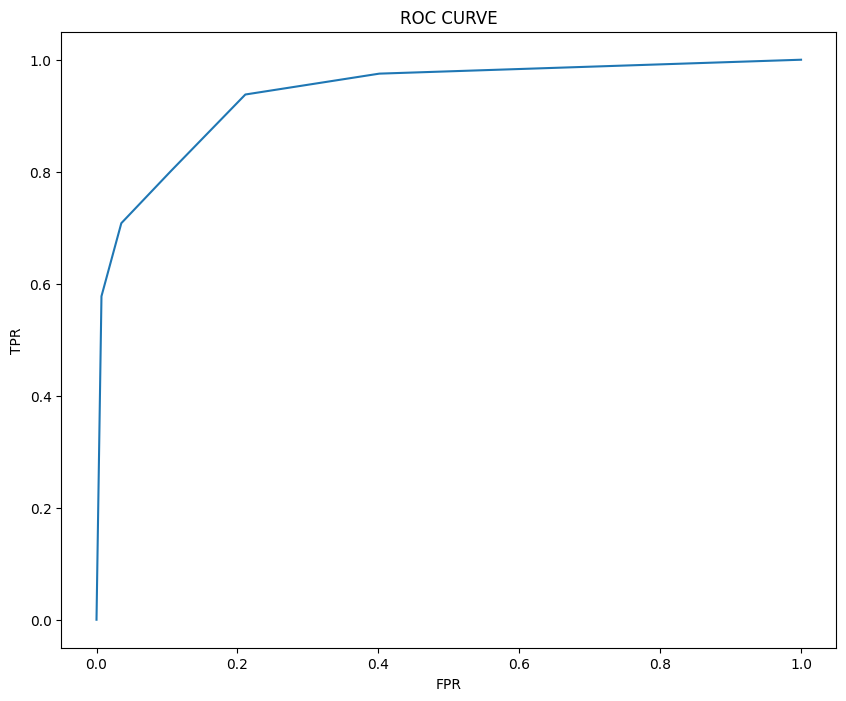

In [97]:
## Plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(y1_test,y1_pred_prob)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr)
plt.title("ROC CURVE")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### 2. Support Vector Machine SVC

In [98]:
from sklearn.svm import SVC

## Building s support vector machine on training data

svm = SVC(kernel='linear',C=.1, gamma=1, probability=True)
svm.fit(x1_train,y1_train)
y1_pred_train_svm = svm.predict(x1_train)
y1_pred_test_svm = svm.predict(x1_test)

## Checking the Accuracy

print('Training Accuracy : ', accuracy_score(y1_train, y1_pred_train_svm))
print('Testing Accuracy : ', accuracy_score(y1_test, y1_pred_test_svm))

Training Accuracy :  0.849645390070922
Testing Accuracy :  0.8382838283828383


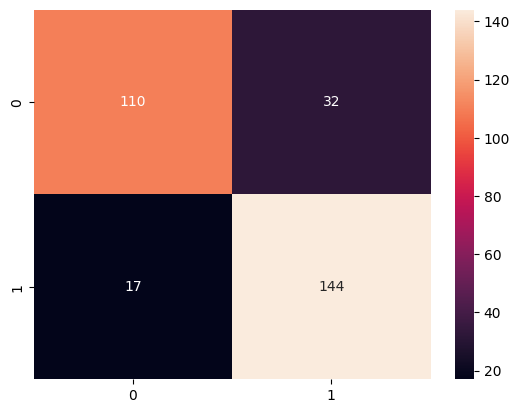

In [99]:
# Confusion Matrix

cn_svm = confusion_matrix(y1_test,y1_pred_test_svm)

ax = plt.subplot()
sns.heatmap(cn_svm, annot=True, ax=ax, fmt='d')
plt.show()

In [100]:
## Classification Report

print(classification_report(y1_test, y1_pred_test_svm))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       142
           1       0.82      0.89      0.85       161

    accuracy                           0.84       303
   macro avg       0.84      0.83      0.84       303
weighted avg       0.84      0.84      0.84       303



In [101]:
## ROC Curve and AUC

y1_pred_prob_svm = svm.predict_proba(x1_test)[:,1]

fpr,tpr,th = roc_curve(y1_test,y1_pred_prob_svm)

print('AUC : ',roc_auc_score(y1_test, y1_pred_prob_svm))

AUC :  0.9082320006998512


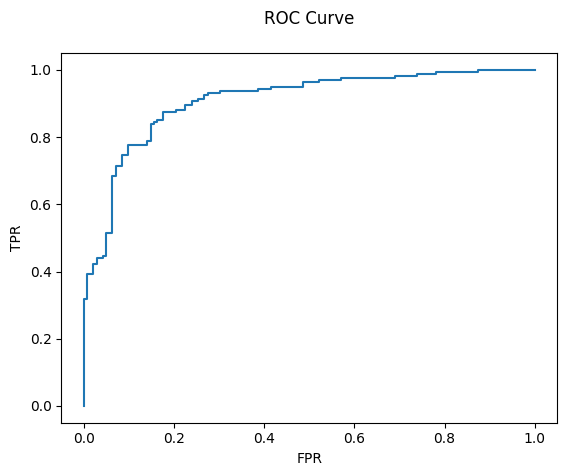

In [102]:
## plot ROC

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve\n')
plt.show()

### 3. Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(x1_train, y1_train)
y1_pred_train_log = lr.predict(x1_train)
y1_pred_test_log = lr.predict(x1_test)

## Accuracy

print('Training Accuracy : ', accuracy_score(y1_train, y1_pred_train_log))
print('Tesing Accuracy : ', accuracy_score(y1_test, y1_pred_test_log))

Training Accuracy :  0.8567375886524823
Tesing Accuracy :  0.8415841584158416


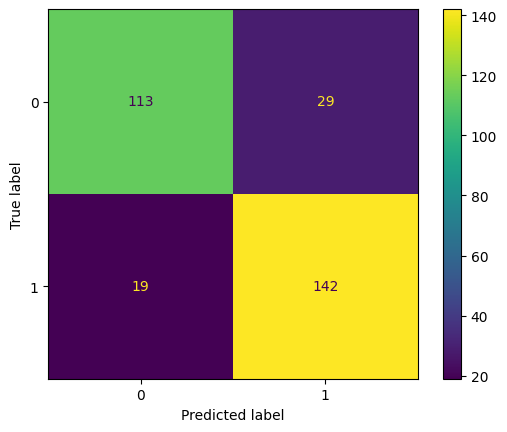

In [104]:
# confusion Matrix

ConfusionMatrixDisplay.from_estimator(lr,x1_test,y1_test)

In [105]:
## Classification Report

print(classification_report(y1_test, y1_pred_test_log))

              precision    recall  f1-score   support

           0       0.86      0.80      0.82       142
           1       0.83      0.88      0.86       161

    accuracy                           0.84       303
   macro avg       0.84      0.84      0.84       303
weighted avg       0.84      0.84      0.84       303



In [106]:
## ROC and AUC

y1_pred_prob_log = lr.predict_proba(x1_test)[:,1]

fpr, tpr, _ = roc_curve(y1_test,y1_pred_prob_log)

print('AUC : ', roc_auc_score(y1_test,y1_pred_prob_log))

AUC :  0.9101565917242586


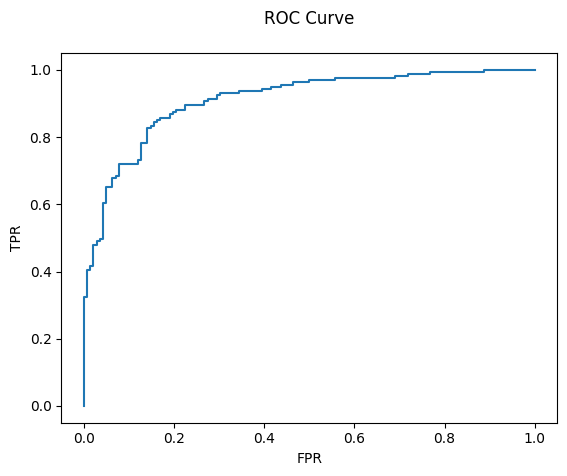

In [107]:
## Plot ROC

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve\n')
plt.show()

### 4. Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

dt = DecisionTreeClassifier(random_state=10)
dt.fit(x1_train,y1_train)
y1_pred_train_DT = dt.predict(x1_train)
y1_pred_test_DT = dt.predict(x1_test)
y1_pred_prob_DT = dt.predict_proba(x1_test)[:,1]

print('Training Accuracy : ',accuracy_score(y1_train, y1_pred_train_DT))
print('Testing Accuracy : ', accuracy_score(y1_test, y1_pred_test_DT))

Training Accuracy :  1.0
Testing Accuracy :  0.9504950495049505


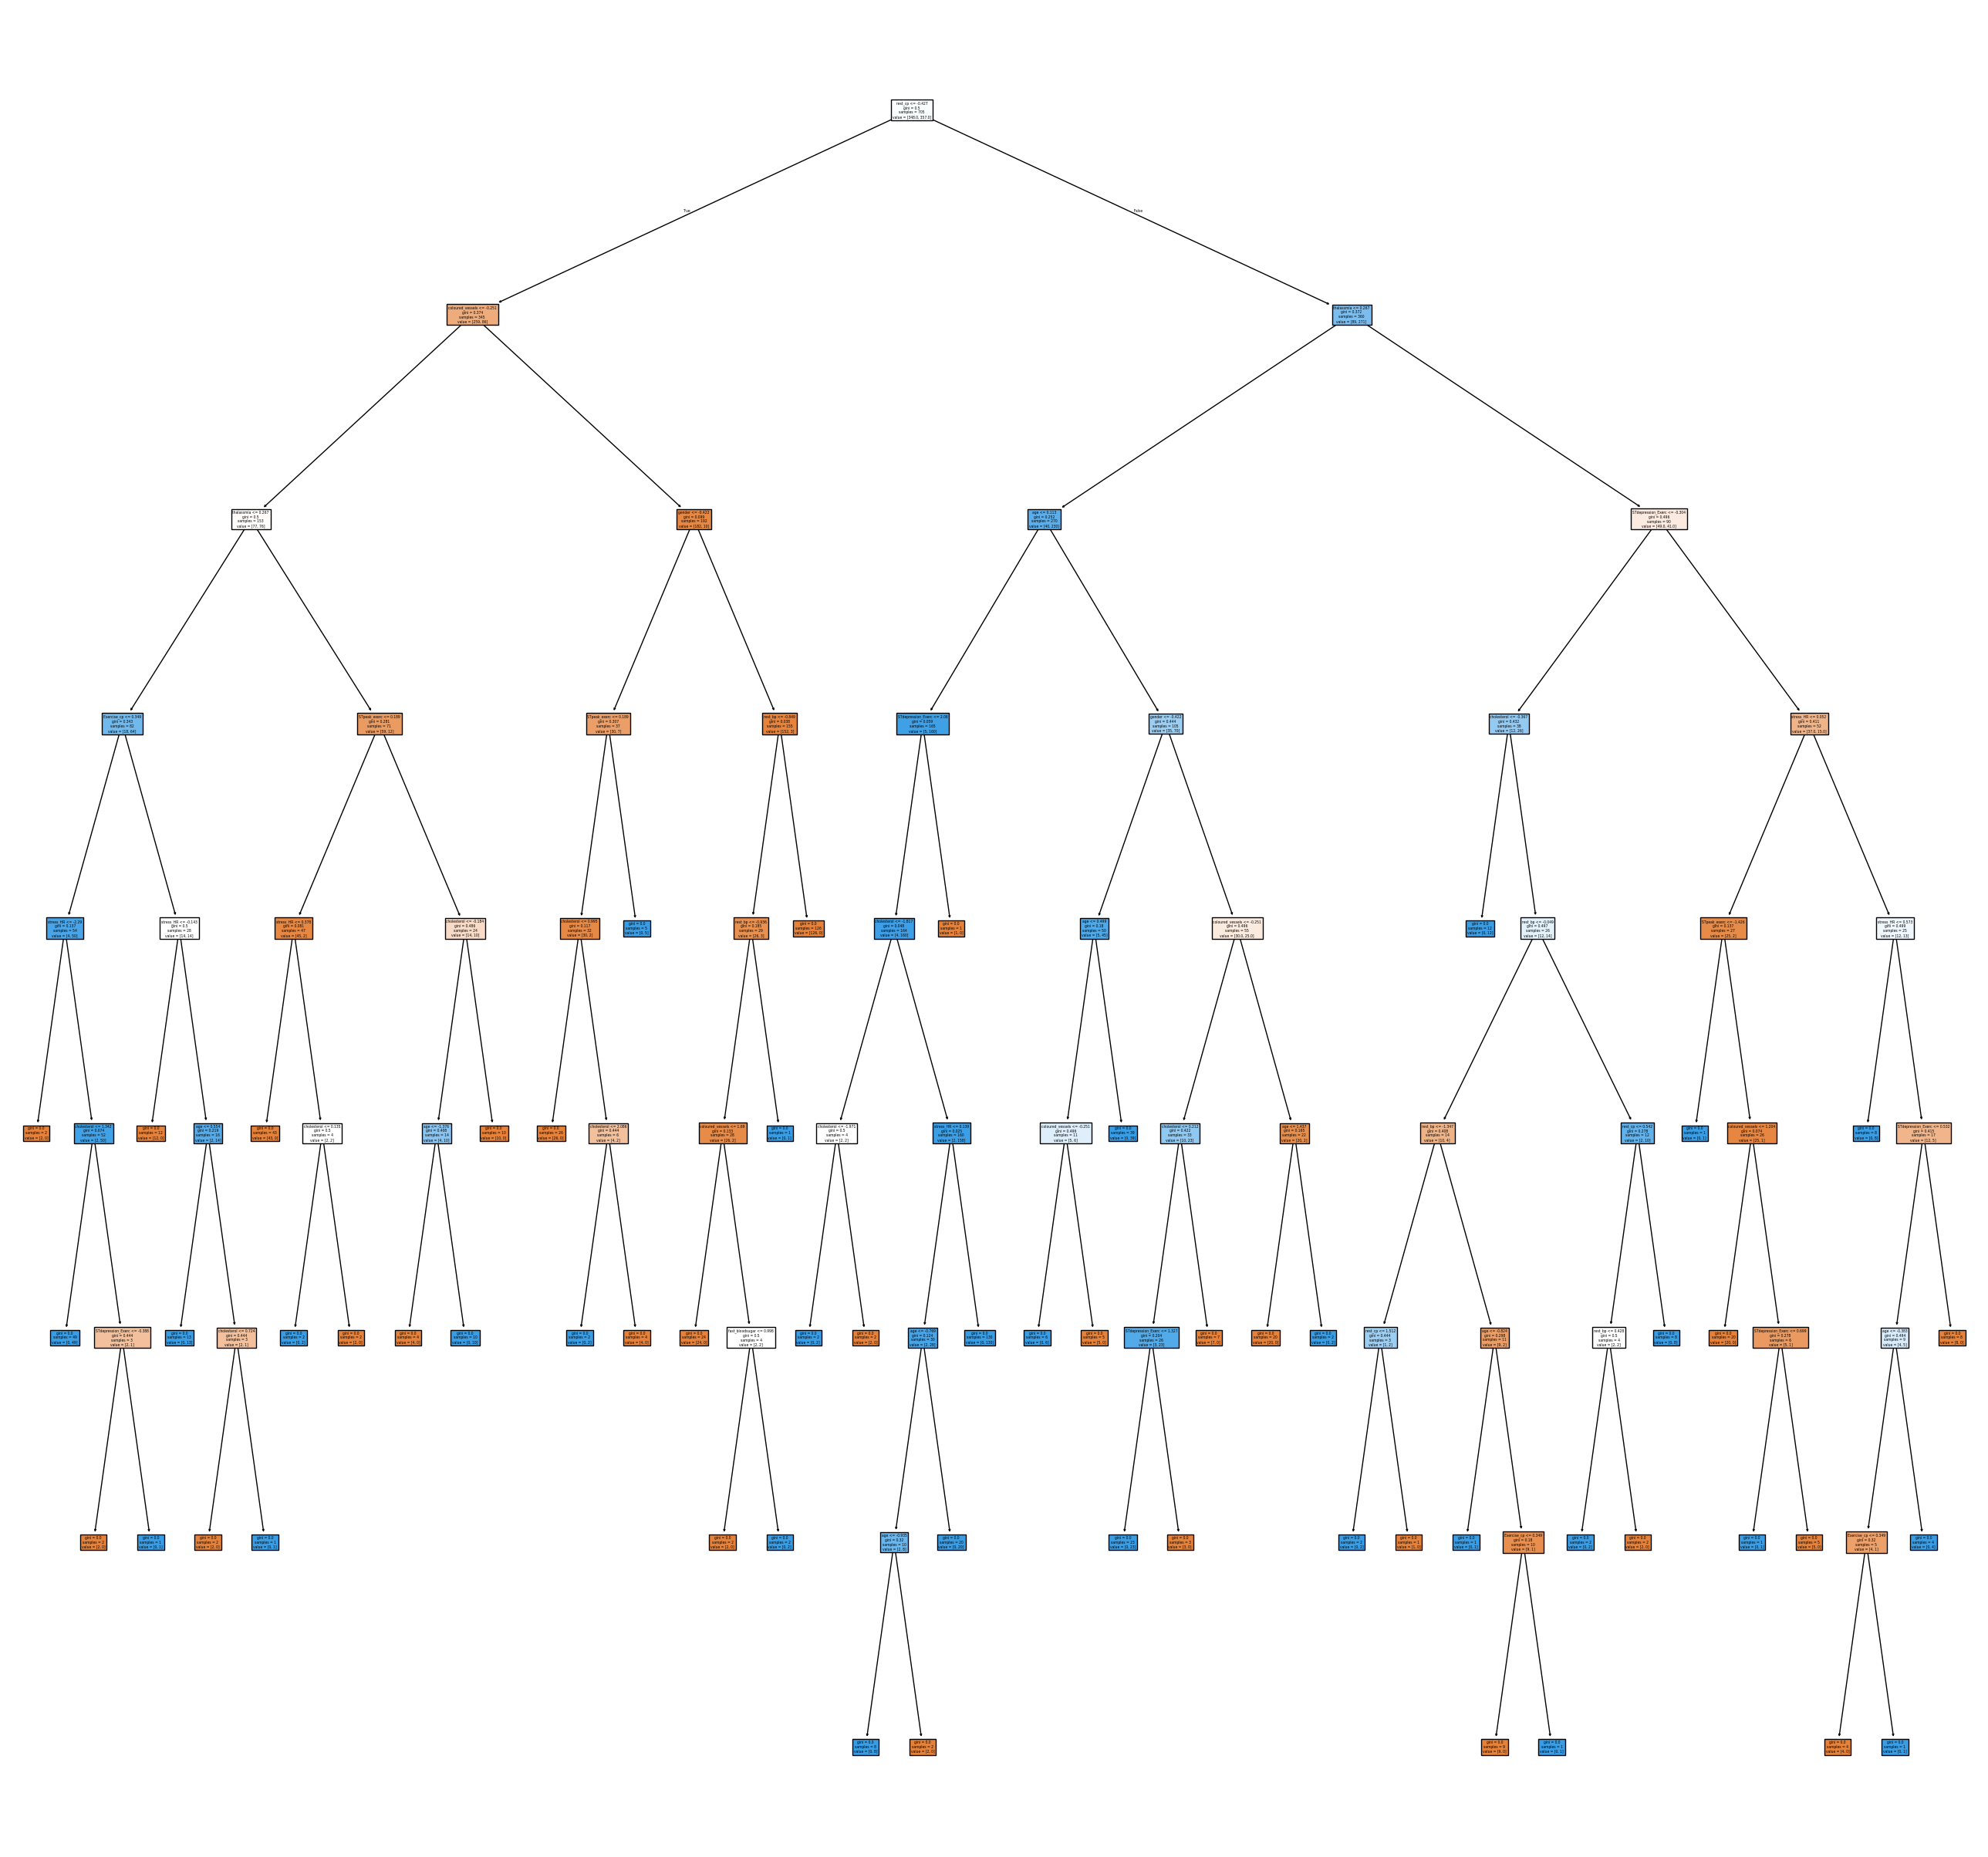

In [109]:
plt.figure(figsize=(33,31))
plot_tree(dt,filled=True, feature_names=x.columns)
plt.show()

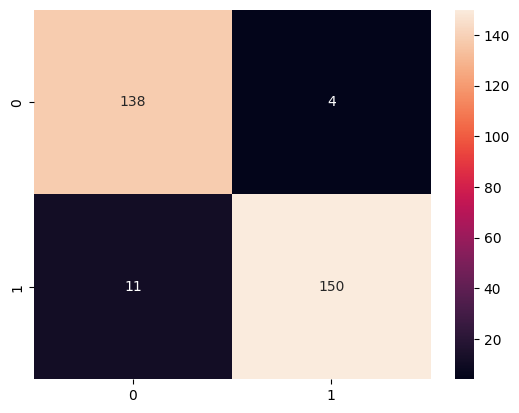

In [110]:
## Confusion Matrix

cn_DT = confusion_matrix(y1_test, y1_pred_test_DT)
sns.heatmap(cn_DT, annot=True, fmt='d')
plt.show()

In [111]:
## Classification report

print(classification_report(y1_test, y1_pred_test_DT))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       142
           1       0.97      0.93      0.95       161

    accuracy                           0.95       303
   macro avg       0.95      0.95      0.95       303
weighted avg       0.95      0.95      0.95       303



In [112]:
## AUC and ROC

fpr,tpr,_ = roc_curve(y1_test,y1_pred_prob_DT)

print('AUC : ', roc_auc_score(y1_test, y1_pred_prob_DT))

AUC :  0.9517540022745167


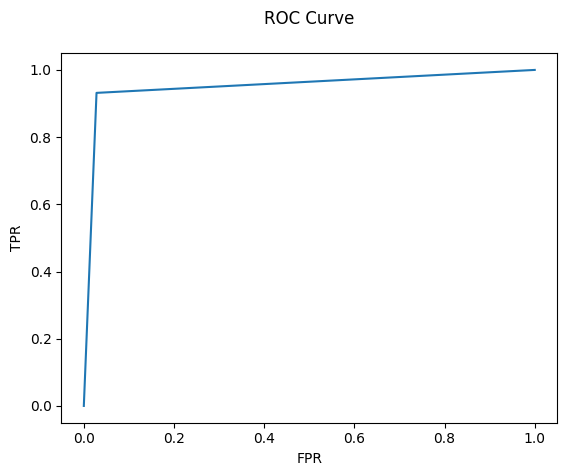

In [113]:
## Plot ROC

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve\n')
plt.show()

In [114]:
dt.feature_importances_

array([0.09901695, 0.03438021, 0.26100747, 0.02597095, 0.08947016,
       0.00567468, 0.        , 0.07573244, 0.02862921, 0.05587124,
       0.03923813, 0.14411365, 0.14089491])

In [115]:
df['Feature Importance'] = dt.feature_importances_.round(3)

In [116]:
df

,Features,VIF,Feature Importance
0,age,1.356617,0.099
1,gender,1.151351,0.034
2,rest_cp,1.294743,0.261
3,rest_bp,1.008157,0.026
4,cholesterol,1.141851,0.089
5,fast_bloodsugar,1.066270,0.006
6,rest_ecg,1.066778,0.000
7,stress_HR,1.632681,0.076
8,Exercise_cp,1.403943,0.029
9,STdepression_Exerc,1.326556,0.056


In [117]:
## Feature Importance shows the % of each features contirbution in Target Variable
## Like from above data its is visible that rest_ecg has no significance in Heart Disease

### 5.Bagging Model

In [118]:
# Bagging Model can reduce the variance without impacting the Bias.
# We prefer to use Bagging when low Bias & high Variance. (Overfitting)
# but it is a black box technology, complicated .

from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()
bag.fit(x1_train,y1_train)
y1_pred_train_bag = bag.predict(x1_train)
y1_pred_test_bag = bag.predict(x1_test)
y1_pred_prob_bag = bag.predict_proba(x1_test)[:,1]

print('Training Accuracy : ', accuracy_score(y1_train, y1_pred_train_bag))
print('Testing Accuracy : ',accuracy_score(y1_test,y1_pred_test_bag))

Training Accuracy :  0.9957446808510638
Testing Accuracy :  0.9537953795379538


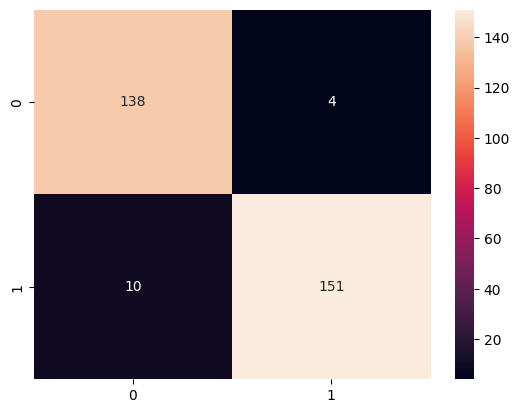

In [119]:
## Confusion Matrix

con_bag = confusion_matrix(y1_test, y1_pred_test_bag)
sns.heatmap(con_bag, annot=True, fmt='d')
plt.show()

In [120]:
## Classification Report

print(classification_report(y1_test,y1_pred_test_bag))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       142
           1       0.97      0.94      0.96       161

    accuracy                           0.95       303
   macro avg       0.95      0.95      0.95       303
weighted avg       0.95      0.95      0.95       303



In [121]:
## AUC and ROC

ftr,tpr,_ = roc_curve(y1_test, y1_pred_prob_bag)

print('AUC : ', roc_auc_score(y1_test, y1_pred_prob_bag))

AUC :  0.9929140057737731


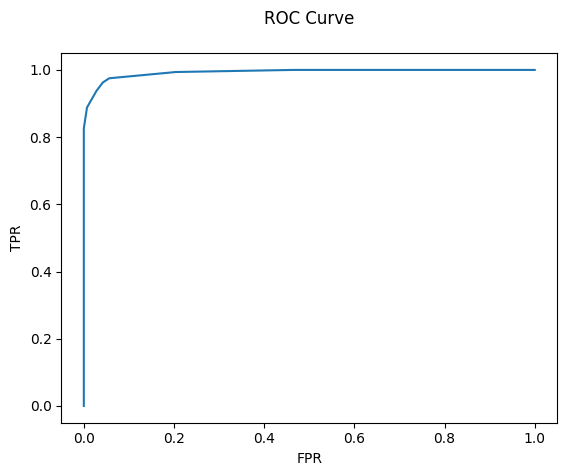

In [122]:
## Plot ROC

plt.plot(ftr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve\n')
plt.show()

### 6.Random Forest with  Entropy

In [125]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 50, criterion='entropy', random_state=10)

# here in RF by default we are getting no. of estimation(n_estimator=100) 100
#n_estimators: We know that a random forest is nothing but a group of many decision trees,
#the n_estimator parameter controls the number of trees inside the classifier.it is 100 bagging,100 sample creation.
# we can change the no. of estimation(n_estimator=200/500 any number).
# in RF by default the criterion is GINI, We can change it to ENTROPY.
# in Bagging case by default the no. of estimation 10


rf.fit(x1_train, y1_train)
y1_pred_train_rf = rf.predict(x1_train)
y1_pred_test_rf = rf.predict(x1_test)
y1_pred_prob_rf = rf.predict_proba(x1_test)[:,1]

print('Training Accuracy : ', accuracy_score(y1_train, y1_pred_train_rf))
print('Testing Accuracy : ', accuracy_score(y1_test, y1_pred_test_rf))

Training Accuracy :  1.0
Testing Accuracy :  0.976897689768977


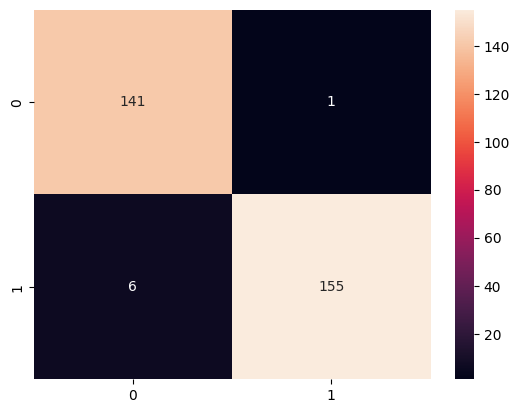

In [126]:
## Confusion Matrix

con_rf = confusion_matrix(y1_test, y1_pred_test_rf)
sns.heatmap(con_rf, annot= True , fmt='d')
plt.show()

In [127]:
# Classification Report

print(classification_report(y1_test, y1_pred_test_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       142
           1       0.99      0.96      0.98       161

    accuracy                           0.98       303
   macro avg       0.98      0.98      0.98       303
weighted avg       0.98      0.98      0.98       303



In [128]:
## AUC and ROC

fpr, tpr, _ = roc_curve(y1_test, y1_pred_prob_rf)

print('AUC : ', roc_auc_score(y1_test, y1_pred_prob_rf))

AUC :  0.9909675443968157


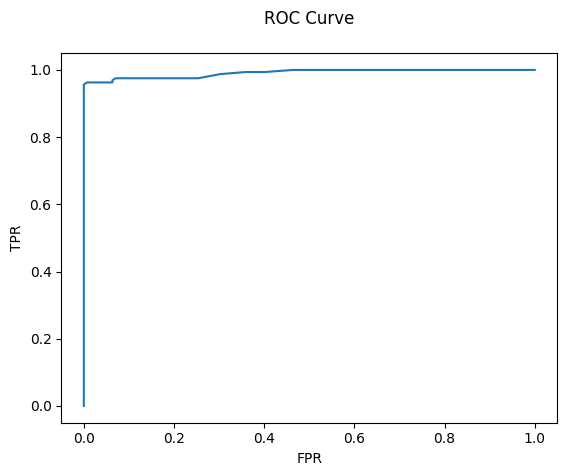

In [129]:
## Plot ROC

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve\n')
plt.show()

In [130]:
# get Feature importance
importance = rf.feature_importances_


# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature {i} has Score :{v.round(4)}')

Feature 0 has Score :0.1032
Feature 1 has Score :0.0411
Feature 2 has Score :0.1165
Feature 3 has Score :0.0494
Feature 4 has Score :0.0974
Feature 5 has Score :0.0117
Feature 6 has Score :0.022
Feature 7 has Score :0.1513
Feature 8 has Score :0.0662
Feature 9 has Score :0.0831
Feature 10 has Score :0.042
Feature 11 has Score :0.1095
Feature 12 has Score :0.1065


<BarContainer object of 13 artists>

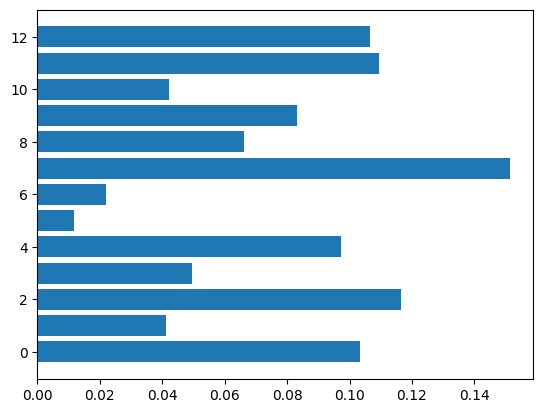

In [131]:
plt.barh([i for i in range(len(importance))], importance)

### 7.Naive Bayes Model

In [132]:
from sklearn.naive_bayes import GaussianNB

# used in Medical diagnosis, Face Recognization,as a classifier, to identify faces and other features, weather
# prediction..
# Training the model on training set
# probability approached based algorithm.
# widely used in text classification.

Nav = GaussianNB()
Nav.fit(x1_train, y1_train)
y1_pred_train_nv = Nav.predict(x1_train)
y1_pred_test_nv = Nav.predict(x1_test)
y1_pred_prob_nv = Nav.predict_proba(x1_test)[:,1]

print('Training Accuracy : ', accuracy_score(y1_train,y1_pred_train_nv))
print('Testing Accuracy : ', accuracy_score(y1_test, y1_pred_test_nv))

Training Accuracy :  0.8425531914893617
Testing Accuracy :  0.8481848184818482


<Axes: >

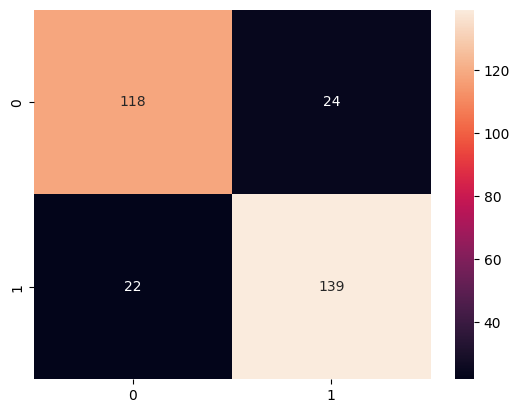

In [133]:
# Confusion Matrix

cont_nv = confusion_matrix(y1_test, y1_pred_test_nv)
sns.heatmap(cont_nv, annot=True, fmt='d')

In [134]:
## Classfication Report

print(classification_report(y1_test, y1_pred_test_nv))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       142
           1       0.85      0.86      0.86       161

    accuracy                           0.85       303
   macro avg       0.85      0.85      0.85       303
weighted avg       0.85      0.85      0.85       303



In [135]:
## ROC va AUC

fpr,tpr,_ = roc_curve(y1_test, y1_pred_prob_nv)

print('AUC : ',roc_auc_score(y1_test, y1_pred_prob_nv))

AUC :  0.8947161228239


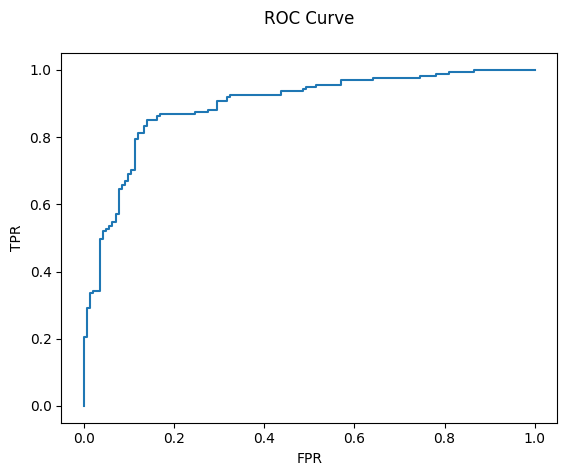

In [136]:
## Plot ROC

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve\n')
plt.show()

In [137]:
# Out of all the models, best results are given by Random Forest, now we can do HyperParameter Tunning on Random Forest to see
# if we can improve the performance

# Improve Model Performance

In [139]:
# Hyper ParameterTunning - Random Forest

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini','entorpy','log_loss'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(x1_train, y1_train)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entorpy', 'log_loss'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [140]:
# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [141]:
# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(x1_train)
y_pred_test = best_model.predict(x1_test)
accuracy_train = accuracy_score(y1_train,y_pred_train)
accuracy_test = accuracy_score(y1_test, y_pred_test)
print("Test Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 1.0
Test Accuracy: 0.976897689768977


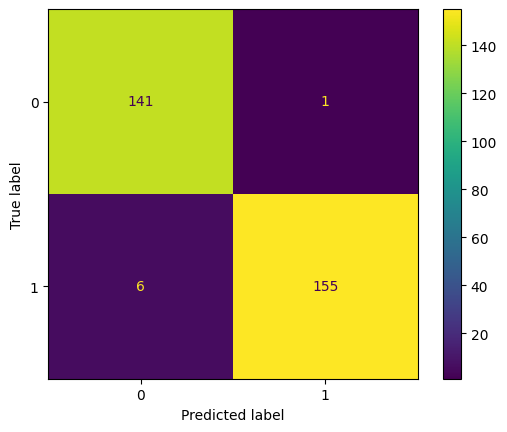

In [142]:
# Confusion Matrix

ConfusionMatrixDisplay.from_estimator(best_model,x1_test,y1_test)

In [144]:
# Classification Report

print(classification_report(y1_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       142
           1       0.99      0.96      0.98       161

    accuracy                           0.98       303
   macro avg       0.98      0.98      0.98       303
weighted avg       0.98      0.98      0.98       303



In [145]:
# ROC Curve

y_pred_prob_bestmodel = best_model.predict_proba(x1_test)[:,1]
tpr,fpr,_ = roc_curve(y1_test,y_pred_prob_bestmodel)

fpr,tpr,th = roc_curve(y1_test,y_pred_prob_bestmodel)

print('AUC : ',roc_auc_score(y1_test, y_pred_prob_bestmodel))

AUC :  0.9967194471174875


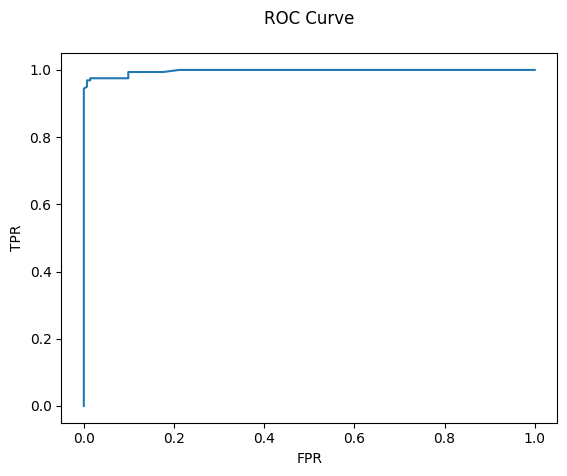

In [146]:
## Plot ROC

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve\n')
plt.show()

In [147]:
# Model Performance is slightly improved so our model is ready for deployement.